# AdD Trabajo Práctico Final CEIA 17Co2024
## Autores: Joaquín Matías Mestanza, Gonzalo Nicolas Silva Caggiano, Ramiro Andrés Feichubuinm




El dataset weatherAUS contiene datos meteorológicos recolectados en varias ubicaciones de Australia.

| Column          | Tipo de dato               | Descripción                                                                                      |
|-----------------|----------------------------|--------------------------------------------------------------------------------------------------|
| **Date**        | Fecha                      | Fecha de la observación meteorológica.                                                           |
| **Location**    | Categórico                 | El nombre de la ubicación en Australia donde se realizó la medición.                             |
| **MinTemp**     | Numérico (float)           | Temperatura mínima registrada (C°).                                                              |
| **MaxTemp**     | Numérico (float)           | Temperatura máxima registrada (C°).                                                              |
| **Rainfall**    | Numérico (float)           | Cantidad total de lluvia en milímetros registrada ese día.                                       |
| **Evaporation** | Numérico (float)           | Cantidad de agua evaporada en milímetros, medida durante las 24 horas hasta las 9 AM.            |
| **Sunshine**    | Numérico (float)           | Cantidad de horas de sol registradas durante el día.                                             |
| **WindGustDir** | Categórico                 | Dirección del viento en ráfagas más fuerte registrado durante el día (en puntos cardinales).     |
| **WindGustSpeed**| Numérico (float)          | Velocidad del viento en ráfagas más fuerte registrado durante el día (en km/h).                  |
| **WindDir9am**  | Categórico                 | Dirección del viento a las 9 AM (en puntos cardinales).                                          |
| **WindDir3pm**  | Categórico                 | Dirección del viento a las 3 PM (en puntos cardinales).                                          |
| **WindSpeed9am**| Numérico (float)           | Velocidad del viento a las 9 AM (en km/h).                                                       |
| **WindSpeed3pm**| Numérico (float)           | Velocidad del viento a las 3 PM (en km/h).                                                       |
| **Humidity9am** | Numérico (float)           | Humedad relativa a las 9 AM (en porcentaje).                                                     |
| **Humidity3pm** | Numérico (float)           | Humedad relativa a las 3 PM (en porcentaje).                                                     |
| **Pressure9am** | Numérico (float)           | Presión atmosférica a las 9 AM (en hectopascales, hPa).                                          |
| **Pressure3pm** | Numérico (float)           | Presión atmosférica a las 3 PM (en hectopascales, hPa).                                          |
| **Cloud9am**    | Categórico (valores entre 0 y 8) | Cantidad de octavos del cielo cubiertos por nubes a las 9 AM.                                    |
| **Cloud3pm**    | Categórico (valores entre 0 y 8) | Cantidad de octavos del cielo cubiertos por nubes a las 3 PM.                                    |
| **Temp9am**     | Numérico (float)           | Temperatura registrada a las 9 AM (C°).                                           |
| **Temp3pm**     | Numérico (float)           | Temperatura registrada a las 3 PM (C°).                                           |
| **RainToday**   | Categórico (Yes/No)        | Indicador si llovió o no ese día (sí/no) (si la cantidad de lluvia registrada fue mayor a 1 mm). |
| **RainTomorrow**| Categórico (Yes/No)        | Indicador si se prevé lluvia al día siguiente (sí/no).                                           |


### Cloud9am / Cloud3pm:

Aclaracion: 0 significa cielo despejado, 8 significa cielo completamente nublado.

### RainTomorrow:

Esta es la columna de target (objetivo) que se utilizará para hacer predicciones.

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("weatherAUS.csv")
print(df.shape)
df.head()

(145460, 23)


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [2]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[5 rows x 23 columns]

In [3]:
df.sample(10)

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
132971  2017-04-27         Hobart      3.3     14.9       2.0          2.0   
21877   2011-01-29  NorfolkIsland     19.9     24.4       0.4          3.6   
115830  2012-05-25     PearceRAAF      2.0     22.4       0.0          NaN   
57038   2014-06-18       Ballarat      7.2      9.3       1.2          NaN   
17156   2014-11-09      Newcastle     14.6     27.0       0.0          NaN   
111348  2016-10-06         Albany     14.8     15.3       1.6         10.4   
85072   2011-07-01       Brisbane     11.4     21.6       0.2          3.0   
35625   2015-01-04  SydneyAirport     22.9     33.8       0.0         10.2   
33838   2009-11-15  SydneyAirport     18.0     24.7       0.0          8.8   
144681  2015-05-09          Uluru      6.4     24.1       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
132971       7.7          NW           56.0        NNW  ...        70.0   
21877       11.9          SE           35.0         SE  ...        74.0   
115830       8.2         NNE           20.0        WSW  ...        60.0   
57038        NaN           E           20.0         SW  ...        78.0   
17156        NaN         NaN            NaN         NE  ...        74.0   
111348       NaN         NaN            NaN        SSW  ...        98.0   
85072        8.8          SE           22.0         SW  ...        70.0   
35625        8.9         SSW           69.0        WNW  ...        63.0   
33838        9.3           S           54.0          S  ...        85.0   
144681       NaN         ESE           30.0         SE  ...        41.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
132971         52.0       1019.0       1015.8       1.0       7.0      7.3   
21877          75.0       1014.3       1015.1       3.0       3.0     21.9   
115830         27.0       1032.3       1028.3       4.0       4.0     11.8   
57038          73.0       1032.5       1029.8       8.0       8.0      8.3   
17156          69.0          NaN          NaN       0.0       1.0     20.8   
111348          NaN       1005.8       1009.2       8.0       NaN     15.0   
85072          48.0       1026.5       1022.7       2.0       6.0     15.9   
35625          51.0       1015.9       1012.2       1.0       7.0     27.9   
33838          66.0       1012.3       1011.6       7.0       2.0     20.8   
144681         23.0       1023.7       1020.0       NaN       NaN     13.6   

        Temp3pm  RainToday  RainTomorrow  
132971     12.9        Yes            No  
21877      23.4         No            No  
115830     21.8         No            No  
57038       8.9        Yes            No  
17156      23.2         No            No  
111348      NaN        Yes            No  
85072      21.0         No            No  
35625      30.3         No            No  
33838      22.9         No            No  
144681     22.9         No            No  

[10 rows x 23 columns]

In [4]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
yes_count = df[df['RainTomorrow'] == 'Yes'].shape[0]
no_count = df[df['RainTomorrow'] == 'No'].shape[0]
nan_count = df['RainTomorrow'].isnull().sum()

print(f"Entradas con 'Yes' en RainTomorrow: {yes_count}")
print(f"Entradas con 'No' en RainTomorrow: {no_count}")
print(f"Entradas vacías en RainTomorrow: {nan_count}")

Entradas con 'Yes' en RainTomorrow: 31877
Entradas con 'No' en RainTomorrow: 110316
Entradas vacías en RainTomorrow: 3267


In [7]:
import missingno
missingno.matrix(df, figsize = (50, 20))

<Axes: >

In [8]:
locations = df['Location'].unique()
locations

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Se realizara una busqueda de las locations con el geolocator de Nominatim. 
Para ver el detalle de esta busqueda revisar `geolocator_utils.py`.

La API de nominatim tiene algunas consideraciones a tener en cuenta:
- La API tiene el trafico limitado, con un limite de 1 request por segundo. 
- Puede no encontrar la ubicación por no tratarse de una ciudad.
- Puede no encontrar la ubicación por no tener el formato solicitado.
  - Hay que separar los nombres para la busqueda. Ej. 'AliceSprings' pasa a ser 'Alice Springs'.
- Puede encontrar una ubicación pero que sea erronea.
  - Viendo los puntos de las locaciones en el mapa, algunos no pertenecian a Australia con lo cual tuvieron que ser ajustados manualmente

Luego de tener estos cuidados se guardo en un archivo llamado `coordinates.json`

In [9]:
import json
with open('coordinates.json', 'r') as file:
    coordinates = json.load(file)
coordinates

{'Albury': [-36.0801, 146.9128],
 'BadgerysCreek': [-33.8972, 150.6921],
 'Cobar': [-31.8495, 145.7791],
 'CoffsHarbour': [-30.2974, 153.1135],
 'Moree': [-29.4572, 149.8463],
 'Newcastle': [-32.9272, 151.7784],
 'NorahHead': [-33.2828, 151.547],
 'NorfolkIsland': [-29.0331, 167.959],
 'Penrith': [-33.7555, 150.6944],
 'Richmond': [-33.5951, 150.735],
 'Sydney': [-33.8688, 151.2093],
 'SydneyAirport': [-33.9399, 151.1753],
 'WaggaWagga': [-35.1084, 147.3737],
 'Williamtown': [-32.8153, 151.8314],
 'Wollongong': [-34.4278, 150.8931],
 'Canberra': [-35.2809, 149.13],
 'Tuggeranong': [-35.42, 149.1264],
 'MountGinini': [-35.5511, 148.7956],
 'Ballarat': [-37.5643, 143.8503],
 'Bendigo': [-36.758, 144.2808],
 'Sale': [-38.1014, 147.0668],
 'MelbourneAirport': [-37.6734, 144.843],
 'Melbourne': [-37.8136, 144.9631],
 'Mildura': [-34.19, 142.134],
 'Nhil': [-36.32, 140.69],
 'Portland': [-38.3519, 141.6008],
 'Watsonia': [-37.7246, 145.0962],
 'Dartmoor': [-37.5667, 141.35],
 'Brisbane': [-2

De esta forma se puede ahora visualizar la cercanía entre ubicaciones, así también como su disposición geográfica.

- La primer relación es importante ya que es bastante verosimil que dos lugares cercanos experimenten lluvias simultáneamente o por lo menos, de forma cercana en el tiempo.
- La segunda de ellas es importante, ya que la altitud o la cercanía a zonas montañosas (en donde las nubes suelen descargar su humedad) así como también la cercanía al mar, pueden ser buenos indicadores, dadas ciertas condiciones, de que puede llover.

In [10]:
# from map_utils import get_interactive_map, save_map_to_png
# 
# mymap = get_interactive_map(coordinates)
# # uncomment following line to show interactive map
# # mymap

In [11]:
# saving 
# save_map_to_png(filename='locations_map.png', map=mymap)

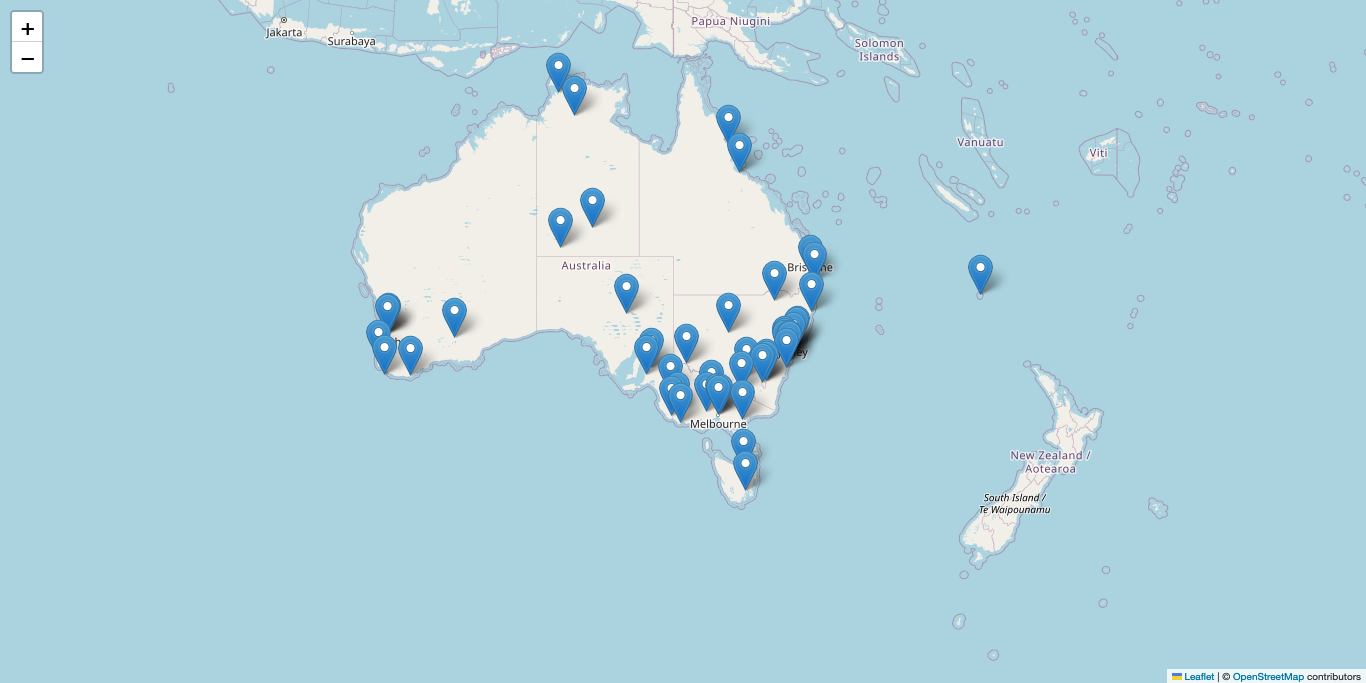

In [12]:
from IPython.display import Image
Image("locations_map.png")

En este mapa se observa que hay una isla de Australia llamada Norfolk Island la cual no solo se encuentra alejado del resto de los puntos sino que tambien es distinta en cuanto al relieve. Es probable que los datos de Norforlk Island sean muy distintos a los de los de mas puntos.

Otro tipo de análisis, es sobre cada ubicación de forma independiente, tratando a los datos como parte de una serie temporal donde cada observación es un valor en el tiempo:

In [13]:
# Crear un diccionario para almacenar DataFrames por ubicación
dfs_by_location = {location: df[df['Location'] == location].copy() for location in locations}

# Se elimina la columna 'Location' ya que es redundante
for location in dfs_by_location:
    dfs_by_location[location].drop(columns=['Location'], inplace=True)

A continuación se muestran solo un ejemplo, para un período reducido en el tiempo, con el fin de que se pueda apreciar la información que proporcionan los gráficos a modo de ejemplo:

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Se define un intervalo arbitrario
start_date = '2017-01-01'
end_date = '2017-12-31'

# Se usan las primeras 3 ubicaciones
locations_to_plot = list(dfs_by_location.keys())[:1]

for location in locations_to_plot:
    location_df = dfs_by_location[location]
    
    plt.figure(figsize=(10, 6))
    
    # Se convierte la columna 'Date' a tipo datetime
    location_df['Date'] = pd.to_datetime(location_df['Date'])
    
    # Se ordena por fecha
    location_df = location_df.sort_values(by='Date')
    
    # Se filtra por el rango de fechas
    location_df = location_df[(location_df['Date'] >= start_date) & (location_df['Date'] <= end_date)]
    
    sns.lineplot(data=location_df, x='Date', y='MaxTemp', label='Max Temp', marker='o')
    sns.lineplot(data=location_df, x='Date', y='MinTemp', label='Min Temp', marker='o')

    # Se agrega sombreado para los valores medios de temperatura
    plt.fill_between(location_df['Date'], location_df['MinTemp'], location_df['MaxTemp'], color='gray', alpha=0.3)
    
    plt.title(f'Evolución de la temperatura en {location}')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid(True)
    
    # Guardar la gráfica en un archivo
    # plt.savefig(f'{location}_temperature_evolution_seaborn.png')
    # plt.show()

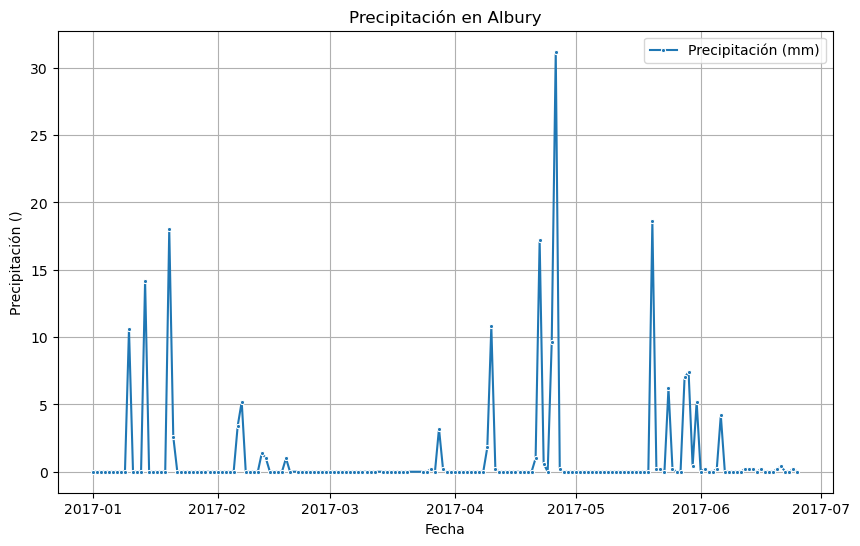

In [15]:
for location in locations_to_plot:
    location_df = dfs_by_location[location]
    
    plt.figure(figsize=(10, 6))
    
    # Se convierte la columna 'Date' a tipo datetime
    location_df['Date'] = pd.to_datetime(location_df['Date'])
    
    # Se ordena por fecha
    location_df = location_df.sort_values(by='Date')
    
    # Se filtra por el rango de fechas
    location_df = location_df[(location_df['Date'] >= start_date) & (location_df['Date'] <= end_date)]
    
    sns.lineplot(data=location_df, x='Date', y='Rainfall', label='Precipitación (mm)', marker='.')
    
    plt.title(f'Precipitación en {location}')
    plt.xlabel('Fecha')
    plt.ylabel('Precipitación ()')
    plt.legend()
    plt.grid(True)
    
    # Guardar la gráfica en un archivo
    # plt.savefig(f'{location}_temperature_evolution_seaborn.png')
    # plt.show()


Luego se pueden buscar distribuciones:

In [16]:
# Seleccionar las columnas numéricas relevantes para generar histogramas
numerical_columns = [
    'MinTemp',          # Temperatura mínima
    'MaxTemp',          # Temperatura máxima
    'Rainfall',         # Precipitación
    'Evaporation',      # Evaporación
    'Sunshine',         # Horas de sol
    'WindGustSpeed',    # Velocidad máxima del viento
    'WindSpeed9am',     # Velocidad del viento a las 9AM
    'WindSpeed3pm',     # Velocidad del viento a las 3PM
    'Humidity9am',      # Humedad a las 9AM
    'Humidity3pm',      # Humedad a las 3PM
    'Pressure9am',      # Presión a las 9AM
    'Pressure3pm',      # Presión a las 3PM
    'Temp9am',          # Temperatura a las 9AM
    'Temp3pm'           # Temperatura a las 3PM
]
len(numerical_columns)

14

In [17]:
from plot_utils import plot_feature_histogram

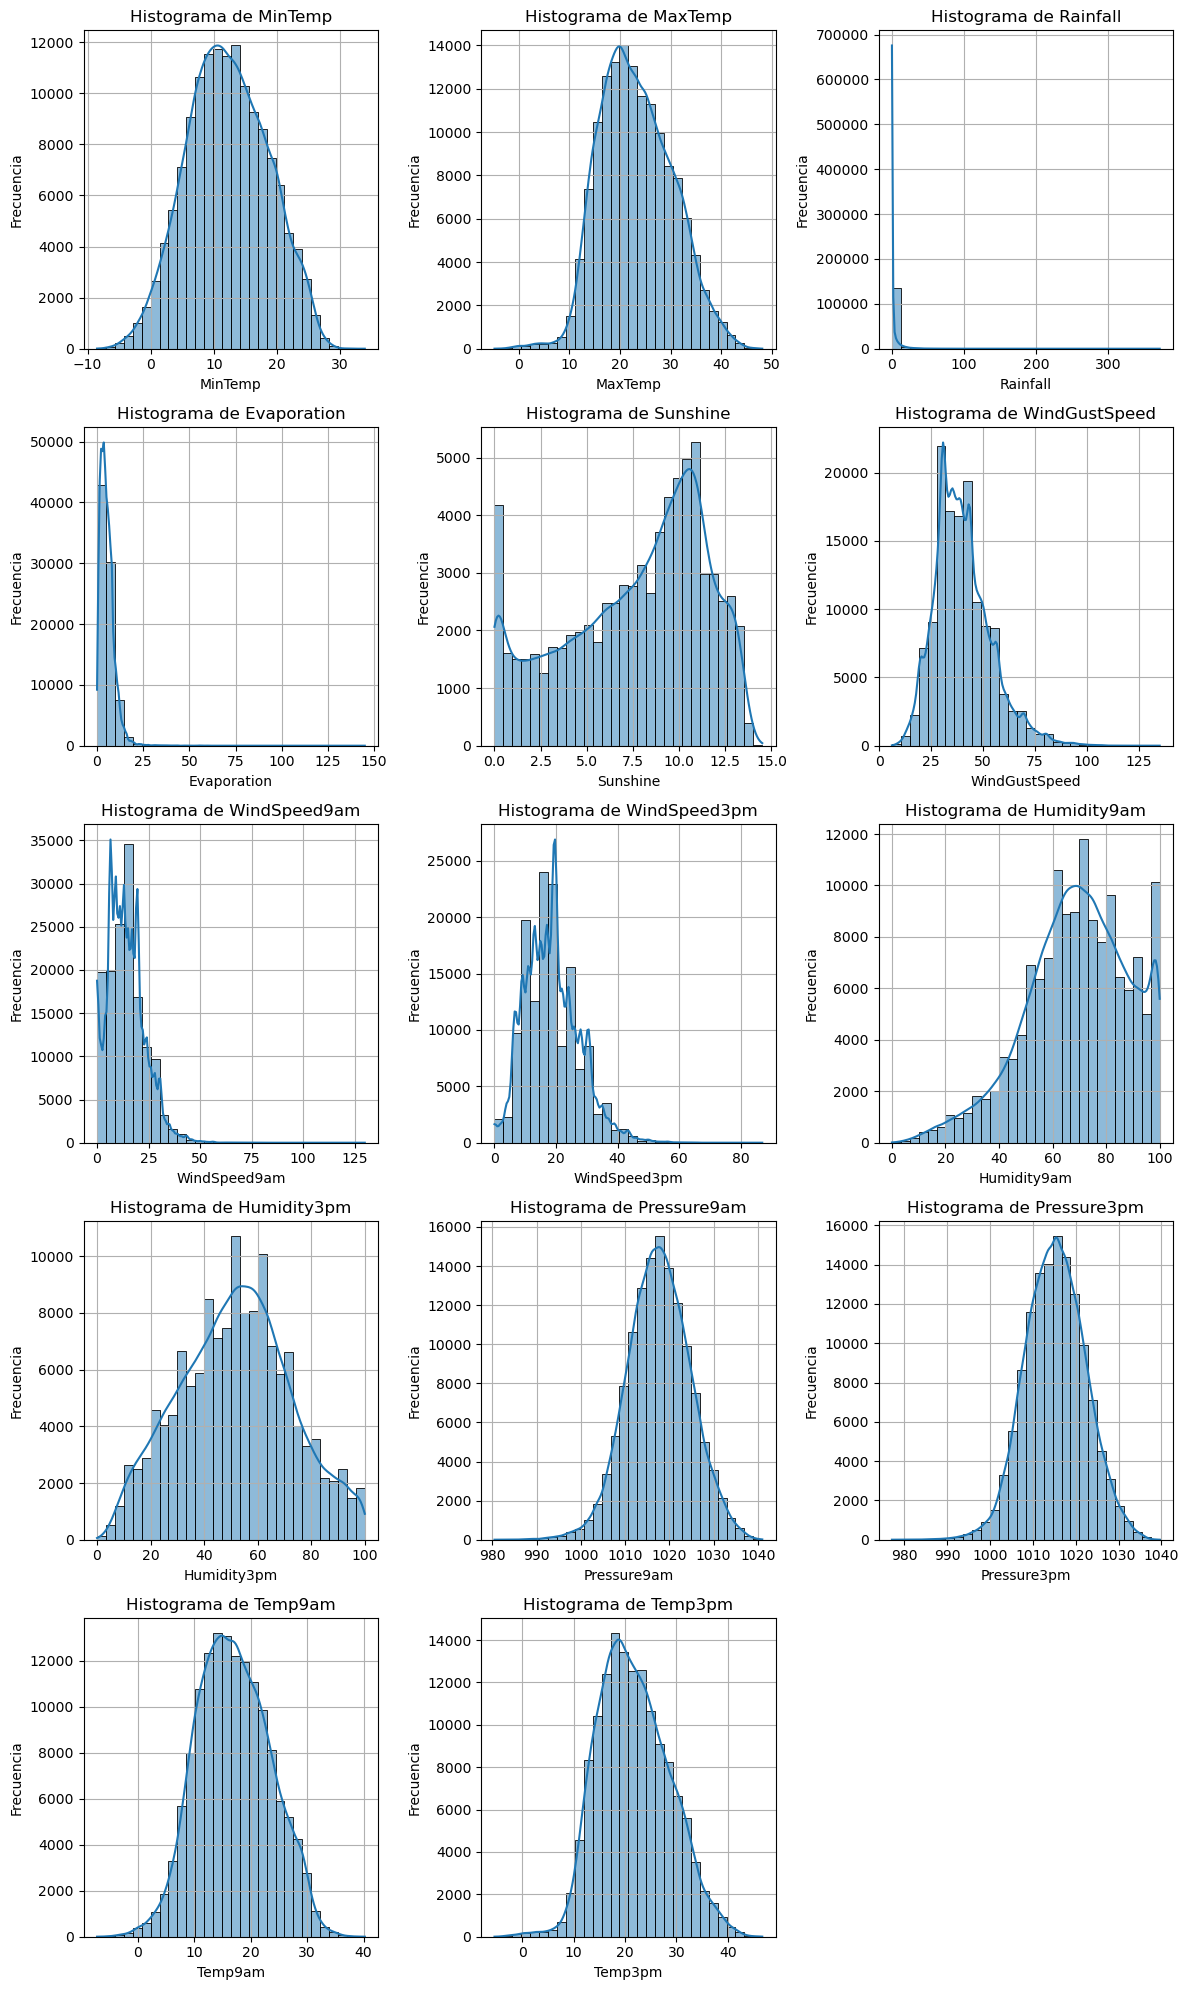

In [18]:
plot_feature_histogram(df, numerical_columns)

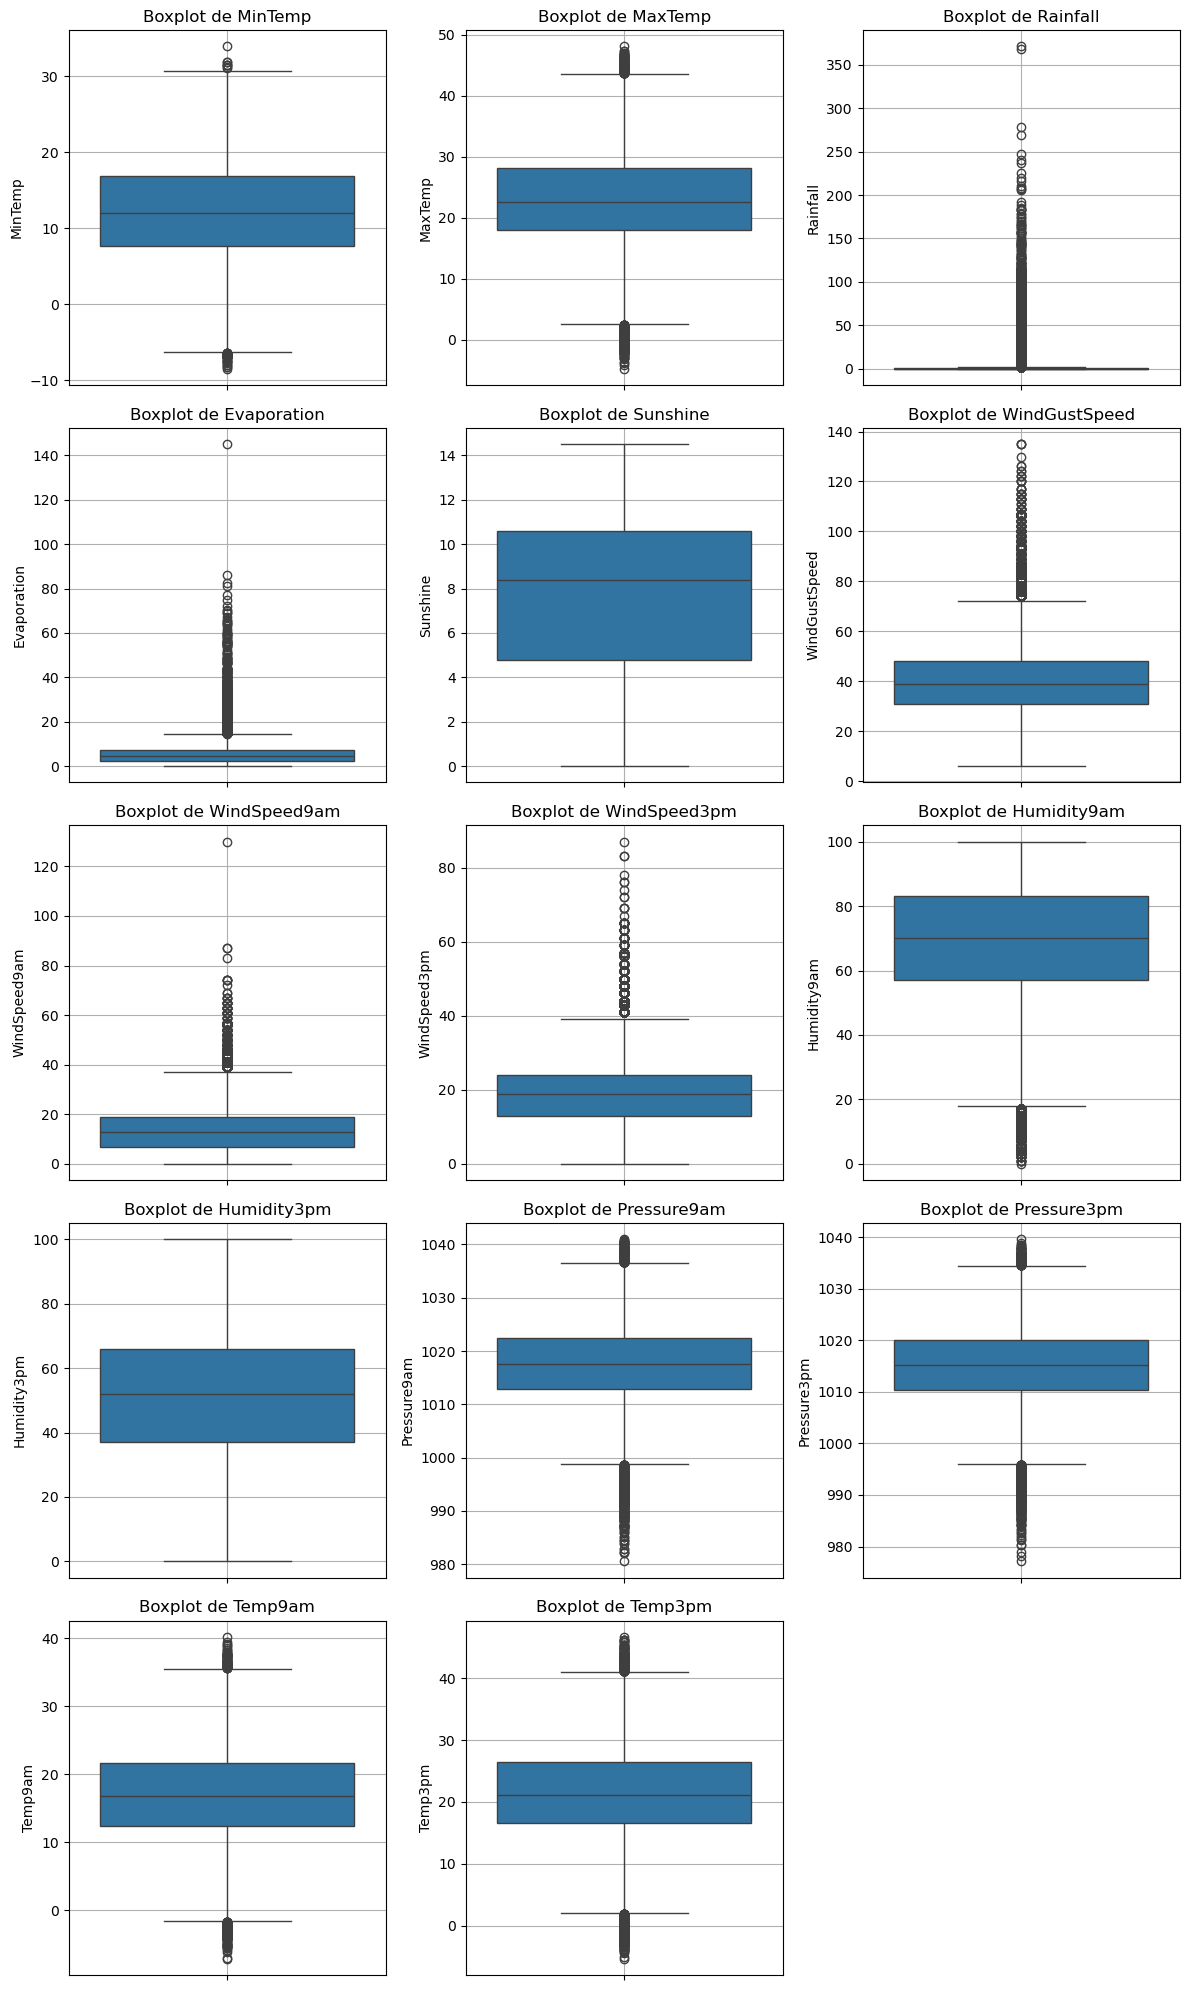

In [19]:
from plot_utils import plot_feature_boxplot
plot_feature_boxplot(df, numerical_columns)

Se puede observar a continuación, que algunos features son categóricos. Otros, ordinales (algunos de los cuales, numéricos) pero como las posibilidades son limitadas, resulta más práctico realizar un conteo de los mismos.

In [20]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [21]:
df['Cloud9am'].unique()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.,  9.])

In [22]:
df['Cloud3pm'].unique()

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.,  9.])

In [23]:
df['WindSpeed9am'].unique()

array([ 20.,   4.,  19.,  11.,   7.,   6.,  15.,  17.,  28.,  24.,  nan,
         9.,   0.,  13.,   2.,  26.,  30.,  22.,  35.,  37.,  31.,  33.,
        48.,  39.,  44.,  43.,  41.,  46.,  56.,  83.,  74.,  52.,  65.,
        50., 130.,  54.,  61.,  57.,  59.,  87.,  67.,  63.,  69.,  72.])

In [24]:
# Lista de columnas categóricas (incluyendo 'Cloud9am' y 'Cloud3pm')
columns_to_plot_countplot = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Cloud9am', 'Cloud3pm']

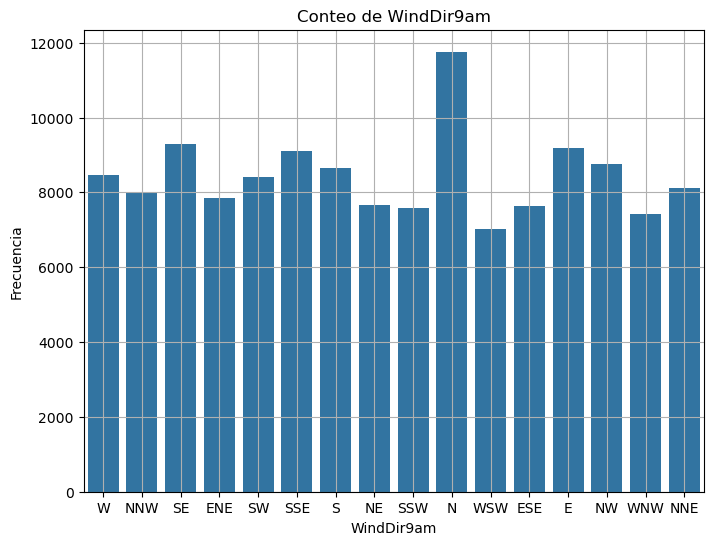

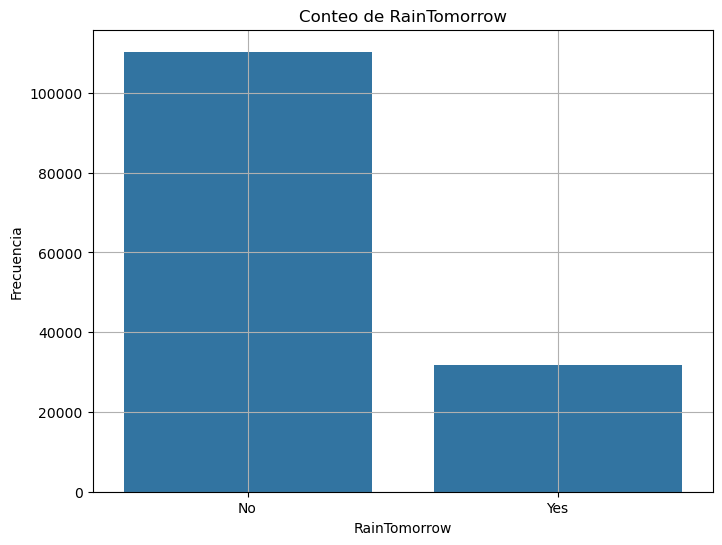

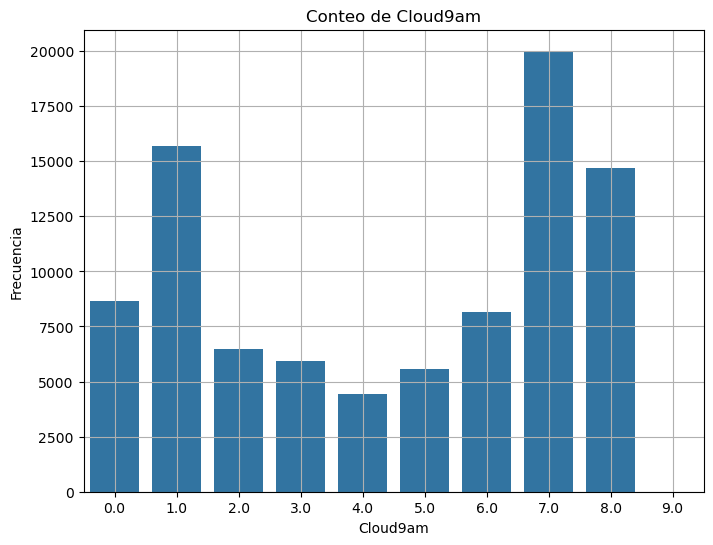

In [25]:
for column in columns_to_plot_countplot:
    plt.figure(figsize=(8, 6))
    
    if column in df.columns:
        sns.countplot(x=df[column].dropna())
        plt.title(f'Conteo de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()
    else:
        print(f"La columna {column} no está presente en el DataFrame.")

Hasta el momento no se ha tenido en cuenta las relaciones entre variables. Se propone ver las siguientes de ellas:

### MaxTemp vs. Sunshine:

La cantidad de horas de sol debería influir directamente en la temperatura máxima registrada en el día.

### Humidity3pm vs. RainTomorrow:

La humedad es un buen indicador de si va a llover. Altos niveles de humedad en la tarde podrían ser un predictor de lluvia al día siguiente.

### WindGustSpeed vs. Rainfall:

Las ráfagas de viento fuertes a menudo están asociadas con condiciones meteorológicas inestables, como tormentas.

### Pressure3pm vs. RainTomorrow:

La presión atmosférica baja es frecuentemente un indicador de mal tiempo. 

### Cloud9am vs. Temp9am:

Los días nublados suelen ser más frescos por la mañana debido a la menor radiación solar.

### Evaporation vs. Sunshine:

La evaporación está directamente influenciada por la radiación solar.

### WindSpeed9am vs. WindSpeed3pm:

Comparar la velocidad del viento en dos momentos del día podría revelar patrones diarios en la intensidad del viento, lo cual es útil para predecir tendencias a lo largo del día.

### Rainfall vs. RainTomorrow:

Se puede evaluar si la cantidad de lluvia caída hoy influye en la probabilidad de lluvia mañana.

### Temp9am vs. MaxTemp:

La temperatura a las 9 AM puede ser un buen predictor de la temperatura máxima del día. Esto puede ser útil para pronósticos de corto plazo basados en datos tempranos.


## MaxTemp vs. Sunshine

In [26]:
df_copy = df.copy()

# df_copy['MaxTemp'] = df_copy['MaxTemp'].interpolate(method='linear')
# df_copy['Sunshine'] = df_copy['Sunshine'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['MaxTemp', 'Sunshine'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Sunshine', y='MaxTemp', hue='RainTomorrow', s=50)
plt.title('Relación entre la temperatura máxima y las horas de sol')
plt.xlabel('Horas de Sol')
plt.ylabel('Temperatura Máxima (°C)')
plt.grid(True)
plt.show()

Hay una relación entre ambas variables aunque no está muy pronunciada. Por otro lado, se observa que a menor cantidad de horas de sol, mayor es la probabilidad de que llueva al día siguiente. A mayores temperaturas, también es más probable que el día siguiente llueva aunque es una relación más débil.

## Humidity3pm vs. RainTomorrow

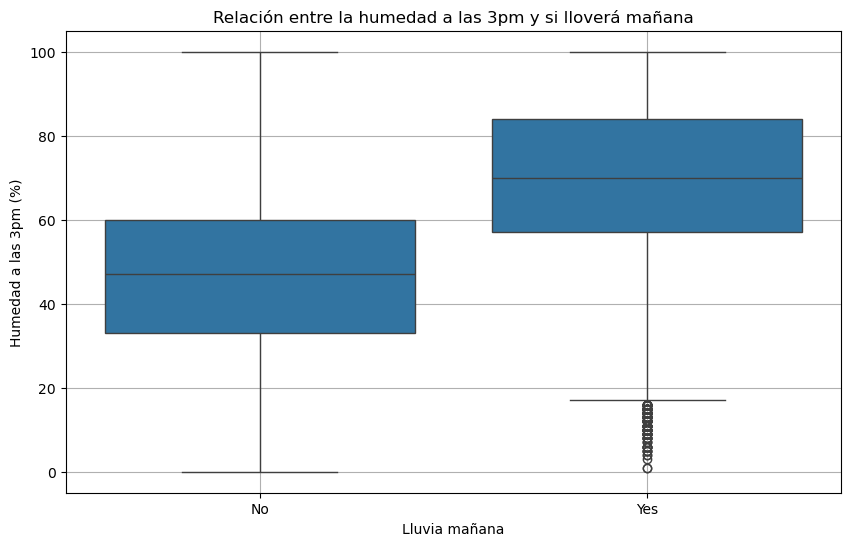

In [27]:
df_copy = df.copy()

# df_copy['Humidity3pm'] = df_copy['Humidity3pm'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Humidity3pm', 'RainTomorrow'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='RainTomorrow', y='Humidity3pm')
plt.title('Relación entre la humedad a las 3pm y si lloverá mañana')
plt.xlabel('Lluvia mañana')
plt.ylabel('Humedad a las 3pm (%)')
plt.grid(True)
plt.show()

Aquí se observa una fuerte relación entre la humedad a las 3pm y el hecho de que precipite al otro día:

- Para los días en que lloverá al día siguiente, el rango intercuartil (IQR) de la humedad a las 3pm está aproximadamente entre 60% y 80%, lo que significa que el 50% central de los datos de humedad se encuentra en ese rango.
- Para los días en que no lloverá al día siguiente, el IQR de la humedad a las 3pm está aproximadamente entre 35% y 60%, lo que indica que el 50% central de la humedad en esos días tiene una humedad más baja.

### WindGustSpeed vs. Rainfall

In [28]:
df_copy = df.copy()

# df_copy['WindGustSpeed'] = df_copy['WindGustSpeed'].interpolate(method='linear')
# df_copy['Rainfall'] = df_copy['Rainfall'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['WindGustSpeed', 'Rainfall'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='WindGustSpeed', y='Rainfall', hue='RainTomorrow', s=50)
plt.title('Relación entre la velocidad de ráfagas de viento y la precipitación')
plt.xlabel('Velocidad de ráfagas de viento (km/h)')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.show()

Aquí se observa que cuanto más crecen ambas variables, hay mayores chances de que precipite al día siguiente. Por otro lado, no se observa dependencia entre variables.

## Pressure9am vs. RainTomorrow

In [29]:
df_copy = df.copy()

# df_copy['Pressure3pm'] = df_copy['Pressure3pm'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Pressure3pm', 'RainTomorrow'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='RainTomorrow', y='Pressure3pm')
plt.title('Relación entre la presión a las 3pm y si lloverá mañana')
plt.xlabel('Lluvia mañana')
plt.ylabel('Presión a las 3pm (hPa)')
plt.grid(True)
plt.show()

Debido a que existe una fuerte superposición de los rangos intercuartiles (IQR), la presión a las 3pm no parece ser un buen indicador. 

## Cloud9am vs. Temp9am

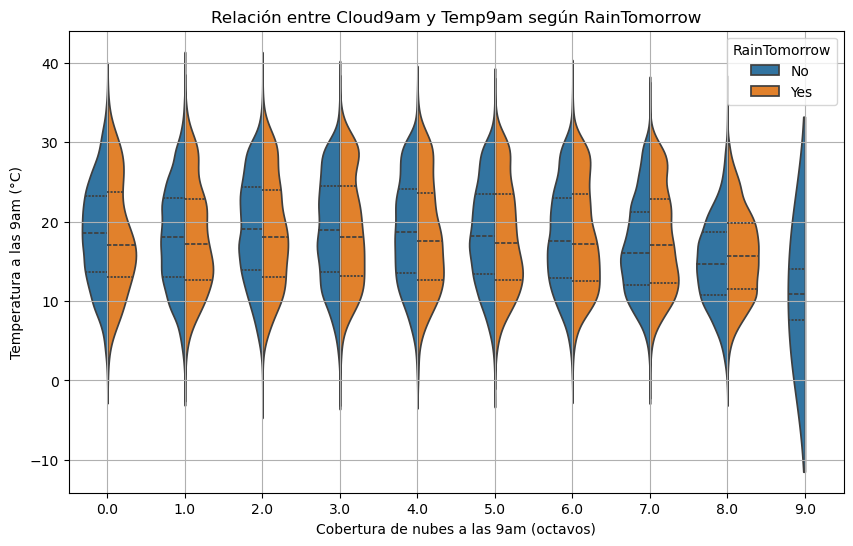

In [30]:
df_copy = df.copy()

# df_copy['Temp9am'] = df_copy['Temp9am'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Cloud9am', 'Temp9am'])

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_copy, x='Cloud9am', y='Temp9am', hue='RainTomorrow', 
                split=True, inner='quartile')
plt.title('Relación entre Cloud9am y Temp9am según RainTomorrow')
plt.xlabel('Cobertura de nubes a las 9am (octavos)')
plt.ylabel('Temperatura a las 9am (°C)')
plt.grid(True)
plt.show()

In [31]:
df_copy = df.copy()

# df_copy['Temp9am'] = df_copy['Temp9am'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Cloud9am', 'Temp9am', 'RainTomorrow'])

plt.figure(figsize=(10, 6))
sns.stripplot(data=df_copy, x='Cloud9am', y='Temp9am', hue='RainTomorrow', dodge=True, size=5, alpha=0.6)
plt.title('Relación entre la cobertura de nubes a las 9am y la temperatura a las 9am')
plt.xlabel('Cobertura de nubes a las 3pm (octavos)')
plt.ylabel('Temperatura a las 9am (°C)')
plt.grid(True)
plt.show()

Se observa que la cobertura de nubes por la mañana suele ser un buen indicador de que al día siguiente no lloverá cuando el valor es 0.

Se procede a visualizar qué pasa luego a las 3pm para ver si existe mayor información una vez avanzado el día:

## Cloud3pm vs. Temp3pm

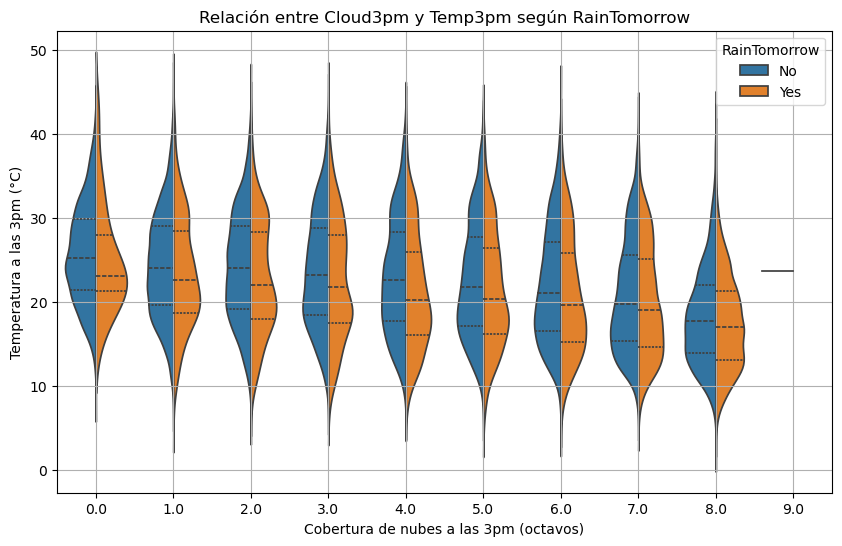

In [32]:
df_copy = df.copy()

# df_copy['Temp3pm'] = df_copy['Temp3pm'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Cloud3pm', 'Temp3pm'])

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_copy, x='Cloud3pm', y='Temp3pm', hue='RainTomorrow', 
                split=True, inner='quartile')
plt.title('Relación entre Cloud3pm y Temp3pm según RainTomorrow')
plt.xlabel('Cobertura de nubes a las 3pm (octavos)')
plt.ylabel('Temperatura a las 3pm (°C)')
plt.grid(True)
plt.show()

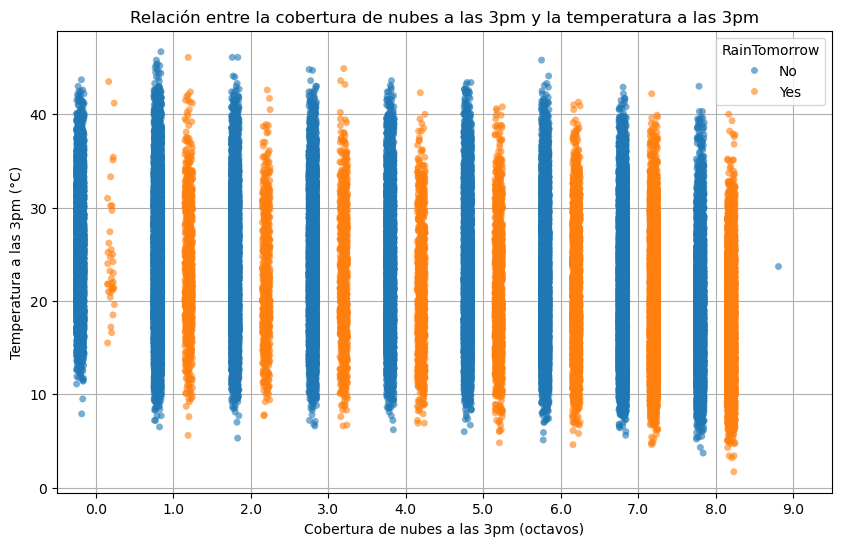

In [33]:
df_copy = df.copy()

# df_copy['Temp3pm'] = df_copy['Temp3pm'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Cloud3pm', 'Temp3pm', 'RainTomorrow'])

plt.figure(figsize=(10, 6))
sns.stripplot(data=df_copy, x='Cloud3pm', y='Temp3pm', hue='RainTomorrow', dodge=True, size=5, alpha=0.6)
plt.title('Relación entre la cobertura de nubes a las 3pm y la temperatura a las 3pm')
plt.xlabel('Cobertura de nubes a las 3pm (octavos)')
plt.ylabel('Temperatura a las 3pm (°C)')
plt.grid(True)
plt.show()

Se observa que la relación anteriormente mencionada se hace más fuerte aún.

## Evaporation vs. Sunshine

In [34]:
df_copy = df.copy()

# df_copy['Evaporation'] = df_copy['Evaporation'].interpolate(method='linear')
# df_copy['Sunshine'] = df_copy['Sunshine'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Evaporation', 'Sunshine'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Evaporation', y='Sunshine', hue='RainTomorrow', s=25)
plt.title('Relación entre Evaporación y Horas de Sol')
plt.xlabel('Evaporación (mm)')
plt.ylabel('Horas de Sol (hs)')
plt.grid(True)
plt.show()

Se observa que aumenta la _frecuencia de aparición de valores mayores_ de evaporación conforme aumentan las horas de sol. Así mismo, si hubo muchas horas de sol se observa que disminuyen las chances de que al día siguiente llueva.

## WindSpeed9am vs. WindSpeed3pm

In [35]:
df_copy = df.copy()

# df_copy['WindSpeed9am'] = df_copy['WindSpeed9am'].interpolate(method='linear')
# df_copy['WindSpeed3pm'] = df_copy['WindSpeed3pm'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['WindSpeed9am', 'WindSpeed3pm'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='WindSpeed9am', y='WindSpeed3pm', hue='RainTomorrow', s=50)
plt.title('Relación entre la velocidad del viento a las 9am y a las 3pm')
plt.xlabel('Velocidad del viento a las 9am (km/h)')
plt.ylabel('Velocidad del viento a las 3pm (km/h)')
plt.grid(True)
plt.show()

Aquí se observa que cuando la velocidad es baja tanto a las 9am como a las 3pm, las chances de que llueva al día siguiente son bajas.

## Rainfall vs. RainTomorrow

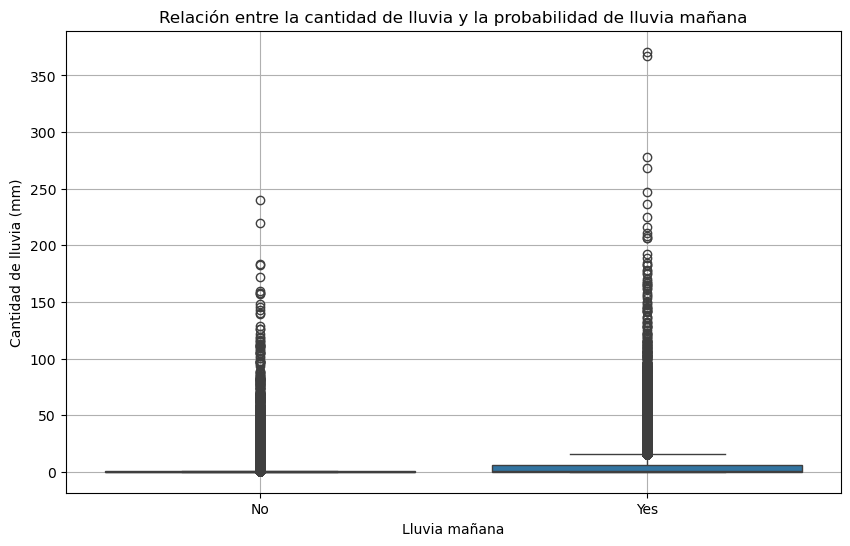

In [36]:
df_copy = df.copy()

# df_copy['Rainfall'] = df_copy['Rainfall'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Rainfall', 'RainTomorrow'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='RainTomorrow', y='Rainfall')
plt.title('Relación entre la cantidad de lluvia y la probabilidad de lluvia mañana')
plt.xlabel('Lluvia mañana')
plt.ylabel('Cantidad de lluvia (mm)')
plt.grid(True)
plt.show()

Éste gráfico muestra que la cantidad de lluvia del día actual es poco relevante para hacer inferencias sobre el día siguiente.

## Temp9am vs. MaxTemp

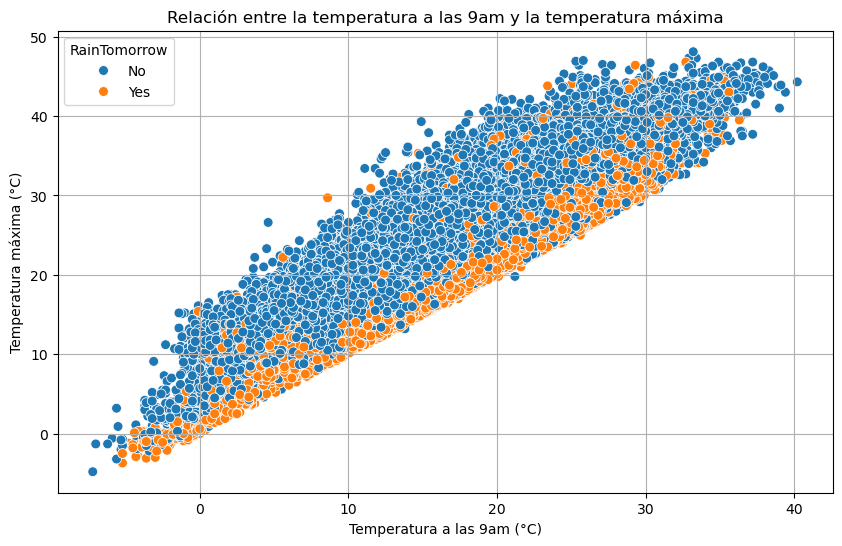

In [37]:
df_copy = df.copy()

# df_copy['Temp9am'] = df_copy['Temp9am'].interpolate(method='linear')
# df_copy['MaxTemp'] = df_copy['MaxTemp'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Temp9am', 'MaxTemp'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Temp9am', y='MaxTemp', hue='RainTomorrow', s=50)
plt.title('Relación entre la temperatura a las 9am y la temperatura máxima')
plt.xlabel('Temperatura a las 9am (°C)')
plt.ylabel('Temperatura máxima (°C)')
plt.grid(True)
plt.show()

Se observa una fuerte relación lineal entre variables. Ello podría servir por ejemplo, para imputar datos faltantes.

Si se considera a los ejes como abscisas y ordenadas, se puede observar que la recta y=x delimita inferiormente la posibilidad de tomar un valor. También se puede observar que cuando las observaciones son cercanas a esta recta, al día siguiente suele llover.

## Análisis de correlación en el tiempo

Se procede ahora a realizar un análisis que busca encontrar patrones temporales con respecto a precipitaciones en diferentes locaciones.

En el siguiente codigo se procede a realizar una matriz de correlacion la cual por tener una gran cantidad de features, se guarda en un pdf llamado `matriz_correlacion.pdf`.

```python
def custom_xcorr(series1, series2):
    # Convertir los valores 'Yes' y 'No' a 1 y 0
    series1 = series1.map({'Yes': 1, 'No': 0}).to_numpy()
    series2 = series2.map({'Yes': 1, 'No': 0}).to_numpy()
    
    # Calcular correlación cruzada usando numpy.correlate
    corr = np.correlate(series1, series2, mode='full')

    # Normalizar la correlación cruzada
    norm = np.sqrt(np.dot(series1, series1) * np.dot(series2, series2))
    corr_normalized = corr / norm if norm != 0 else 0
    
    return corr_normalized

from itertools import combinations

dfs_by_location_copy = dfs_by_location.copy()

# Se crean matrices vacías para almacenar las correlaciones y los lags
correlation_matrix = pd.DataFrame(index=locations, columns=locations, dtype=float)
lag_matrix = pd.DataFrame(index=locations, columns=locations, dtype=float)

for loc1, loc2 in combinations(locations, 2):
    df1 = dfs_by_location_copy[loc1]
    df2 = dfs_by_location_copy[loc2]

    df1 = df1.dropna(subset=['RainToday'])
    df2 = df2.dropna(subset=['RainToday'])

    df2.loc[:, 'Date'] = pd.to_datetime(df2['Date'])
    df1.loc[:, 'Date'] = pd.to_datetime(df1['Date'])

    # Se buscan fechas en común
    fechas_comunes = df1['Date'].isin(df2['Date'])
    fechas_comunes = df1['Date'][fechas_comunes]

    if len(fechas_comunes) > 0:
        df1_comun = df1[df1['Date'].isin(fechas_comunes)]
        df2_comun = df2[df2['Date'].isin(fechas_comunes)]

        correlacion = custom_xcorr(df1_comun['RainToday'], df2_comun['RainToday'])
        
        # Se obtiene el valor máximo de correlación y su desplazamiento (lag)
        max_corr = correlacion.max()
        best_lag = np.argmax(correlacion) - (len(df1_comun) - 1)
        
        correlation_matrix.loc[loc1, loc2] = max_corr
        correlation_matrix.loc[loc2, loc1] = max_corr

        lag_matrix.loc[loc1, loc2] = best_lag
        lag_matrix.loc[loc2, loc1] = -best_lag

    #     print(f"Máxima correlación entre {loc1} y {loc2}: {max_corr} con un desplazamiento de: {best_lag} días")
    # else:
    #     print(f"No hay fechas comunes entre {loc1} y {loc2}.")

np.fill_diagonal(correlation_matrix.values, 1)
np.fill_diagonal(lag_matrix.values, 0)

correlation_matrix_rounded = correlation_matrix.round(2).astype(str)

lag_matrix_int = lag_matrix.astype(int).astype(str)

combined_matrix = correlation_matrix_rounded + '\nL: ' + lag_matrix_int

plt.figure(figsize=(60, 48))
sns.heatmap(correlation_matrix, annot=combined_matrix, fmt='', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación Cruzada entre Locaciones', fontsize=20)
plt.savefig('matriz_correlacion.svg', format='svg', bbox_inches='tight')
plt.savefig('matriz_correlacion.pdf', format='pdf', bbox_inches='tight')
plt.close()

```

## Análisis de outliers

En esta seccion se investigaran 3 criterios para la identificacion de outliers: 
- Visual
- IQR
- Z-score

## Visual

In [38]:
visual_query = '(Rainfall < 7.5 | Rainfall.isnull()) & (Evaporation < 22 | Evaporation.isnull()) & (WindSpeed9am < 50 | WindSpeed9am.isnull()) & (WindSpeed3pm < 60 | WindSpeed3pm.isnull()) & (WindGustSpeed < 100 | WindGustSpeed.isnull()) & (Pressure9am > 995 | Pressure9am.isnull())'

In [39]:
df_after_visual = df.query(f"{visual_query}")
visual_outliers = len(df) - len(df_after_visual)
print(f'Dropped {100*visual_outliers/len(df):.2f} % of the dataset after visual outliers removal.')

Dropped 9.06 % of the dataset after visual outliers removal.


In [40]:
plot_feature_histogram(df_after_visual, numerical_columns)

### Tecnica de IQR:

In [41]:
def iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def get_iqr_query():
    iqr_ranges = []
    for column in numerical_columns:
        a,b = iqr(df[column])
        range_str = f'{a} < {column} & {column} < {b}'
        range_plus_null = f'(({range_str}) | {column}.isnull())'
        # print(range_plus_null)
        iqr_ranges.append(range_plus_null)
    iqr_query = " & ".join(iqr_ranges)
    return iqr_query

In [42]:
iqr_query = get_iqr_query()
df_after_iqr = df.query(f"{iqr_query}")

In [43]:
iqr_outliers = len(df) - len(df_after_iqr)
print(f'Dropped {100*iqr_outliers/len(df):.2f} % of the dataset after visual outliers removal.')

Dropped 23.85 % of the dataset after visual outliers removal.


In [44]:
plot_feature_histogram(df_after_iqr, numerical_columns)

### Tecnica Z-scores

In [45]:
def get_z_score_query(_df, threshold=3):
    mean = _df.mean()
    std = _df.std()
    query_list = []
    for col in _df.columns: 
        z_q = f"abs(({col} - {mean[col]})/ {std[col]}) <= {threshold}" 
        z_q_plus_null = f'( ({z_q}) | {col}.isnull())'
        # print(z_q_plus_null)
        query_list.append(z_q_plus_null)
    query_str = " & ".join(query_list)
    return query_str

In [46]:
df_without_missings = df.dropna() # drops nan but makes a copy
z_score_query = get_z_score_query(df_without_missings[numerical_columns])

In [47]:
df_after_z_score = df.query(f"{z_score_query}")
z_score_outliers = len(df) - len(df_after_z_score)
print(f'Dropped {100*z_score_outliers/len(df):.2f} % of the dataset after visual outliers removal.')

Dropped 5.83 % of the dataset after visual outliers removal.


In [48]:
plot_feature_histogram(df_after_z_score, numerical_columns)

## Escalamiento
Antes de hacer el escalamiento, lo que se hara es transformar la variale Location y todas las de direccion del viento variables numerica, asi tambien se puede escalar.

In [49]:
def get_coordinates(location):
    return coordinates.get(location, [None, None])

In [50]:
def preprocesamiento_location(df, columns_to_drop):

    df_pre_imputacion = df.copy()
    df_pre_imputacion[['Latitud', 'Longitud']] = df['Location'].apply(get_coordinates).apply(pd.Series)
    df_pre_imputacion = df_pre_imputacion.drop(columns=columns_to_drop)
    return df_pre_imputacion

In [51]:
df_2_copy = df.copy()
df_2_copy = preprocesamiento_location(df_2_copy, ['Date', 'Location'])

In [52]:
wind_direction_mapping = {
    'N': 0,
    'NE': 45,
    'E': 90,
    'SE': 135,
    'S': 180,
    'SW': 225,
    'W': 270,
    'NW': 315
}

wind_related_columns = ["WindGustDir", "WindDir9am", "WindDir3pm"]

In [53]:
def windCircularMapping(df, columns_to_map, mapping):

    df_circular_mapped = df.copy()

    for column in columns_to_map:
        df_circular_mapped[column+'_Angle'] = df_circular_mapped[column].map(mapping)

        df_circular_mapped[column+'_Sin'] = np.sin(np.radians(df_circular_mapped[column+'_Angle']))
        df_circular_mapped[column+'_Cos'] = np.cos(np.radians(df_circular_mapped[column+'_Angle']))
        
        df_circular_mapped = df_circular_mapped.drop(columns=[column, column+'_Angle'])
        
    return df_circular_mapped

In [54]:
# Seleccionar las columnas numéricas relevantes para generar histogramas
new_numerical_columns = [
    *numerical_columns,
    'WindGustDir_Sin',      # Direccion de rafaga - componente vertical
    'WindDir9am_Sin',       # Direccion de viento a las 9am - componente vertical
    'WindDir3pm_Sin',       # Direccion de viento a las 3pm - componente vertical
    'WindGustDir_Cos',      # Direccion de rafaga - componente horizontal
    'WindDir9am_Cos',       # Direccion de viento a las 9am - componente horizontal
    'WindDir3pm_Cos',       # Direccion de viento a las 3pm - componente horizontal
    'Latitud',              # Latitud
    'Longitud',             # Longitud
]

In [55]:
df_circular = windCircularMapping(df_2_copy, wind_related_columns, wind_direction_mapping)

In [56]:
df_circular.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  RainToday  \
0          20.0          24.0         71.0         22.0  ...         No   
1           4.0          22.0         44.0         25.0  ...         No   
2          19.0          26.0         38.0         30.0  ...         No   
3          11.0           9.0         45.0         16.0  ...         No   
4           7.0          20.0         82.0         33.0  ...         No   

   RainTomorrow  Latitud  Longitud  WindGustDir_Sin  WindGustDir_Cos  \
0            No -36.0801  146.9128        -1.000000    -1.836970e-16   
1            No -36.0801  146.9128              NaN              NaN   
2            No -36.0801  146.9128              NaN              NaN   
3            No -36.0801  146.9128         0.707107     7.071068e-01   
4            No -36.0801  146.9128        -1.000000    -1.836970e-16   

  WindDir9am_Sin WindDir9am_Cos  WindDir3pm_Sin  WindDir3pm_Cos  
0      -1.000000  -1.836970e-16             NaN             NaN  
1            NaN            NaN             NaN             NaN  
2      -1.000000  -1.836970e-16             NaN             NaN  
3       0.707107  -7.071068e-01        1.000000    6.123234e-17  
4            NaN            NaN       -0.707107    7.071068e-01  

[5 rows x 26 columns]

In [57]:
df_after_outliers_removal = df_circular[new_numerical_columns].copy()

df_after_outliers_removal.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm  ...        Temp9am       Temp3pm  \
count  142806.000000  140953.000000  ...  143693.000000  141851.00000   
mean       68.880831      51.539116  ...      16.990631      21.68339   
std        19.029164      20.795902  ...       6.488753       6.93665   
min         0.000000       0.000000  ...      -7.200000      -5.40000   
25%        57.000000      37.000000  ...      12.300000      16.60000   
50%        70.000000      52.000000  ...      16.700000      21.10000   
75%        83.000000      66.000000  ...      21.600000      26.40000   
max       100.000000     100.000000  ...      40.200000      46.70000   

       WindGustDir_Sin  WindDir9am_Sin  WindDir3pm_Sin  WindGustDir_Cos  \
count     71217.000000    72182.000000    7.446300e+04     7.121700e+04   
mean         -0.015648        0.007837   -1.120046e-02    -2.904144e-02   
std           0.709986        0.693307    7.059108e-01     7.034527e-01   
min          -1.000000       -1.000000   -1.000000e+00    -1.000000e+00   
25%          -0.707107       -0.707107   -7.071068e-01    -7.071068e-01   
50%           0.000000        0.000000    1.224647e-16    -1.836970e-16   
75%           0.707107        0.707107    7.071068e-01     7.071068e-01   
max           1.000000        1.000000    1.000000e+00     1.000000e+00   

       WindDir9am_Cos  WindDir3pm_Cos        Latitud       Longitud  
count    7.218200e+04    7.446300e+04  145460.000000  145460.000000  
mean     3.029609e-02   -4.543045e-02     -32.744943     142.062606  
std      7.199723e-01    7.067631e-01       5.997198      12.144726  
min     -1.000000e+00   -1.000000e+00     -42.882100     115.066700  
25%     -7.071068e-01   -7.071068e-01     -36.080100     138.600700  
50%      6.123234e-17   -1.836970e-16     -33.897200     145.779100  
75%      7.071068e-01    7.071068e-01     -31.849500     150.694400  
max      1.000000e+00    1.000000e+00     -12.463400     167.959000  

[8 rows x 22 columns]

In [58]:
# df_after_z_score, df_after_visual, df_after_iqr
df_after_outliers_removal[numerical_columns] = df_after_z_score[numerical_columns].copy()
df_after_outliers_removal.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  135575.000000  135781.000000  133862.000000  77794.000000   
mean       12.093304      23.258700       1.339556      5.163036   
std         6.324091       6.920673       3.447485      3.258142   
min        -5.700000       3.400000       0.000000      0.000000   
25%         7.500000      18.000000       0.000000      2.600000   
50%        11.900000      22.700000       0.000000      4.600000   
75%        16.700000      28.200000       0.400000      7.200000   
max        31.400000      45.100000      23.000000     16.500000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  71272.000000  127271.000000  135315.000000  134093.000000   
mean       7.701912      38.940128      13.501888      18.223942   
std        3.739646      12.247241       8.234746       8.267821   
min        0.000000       6.000000       0.000000       0.000000   
25%        5.000000      30.000000       7.000000      13.000000   
50%        8.600000      37.000000      13.000000      17.000000   
75%       10.700000      46.000000      19.000000      24.000000   
max       14.500000      80.000000      39.000000      44.000000   

         Humidity9am    Humidity3pm  ...        Temp9am        Temp3pm  \
count  134551.000000  132797.000000  ...  135389.000000  133652.000000   
mean       68.839942      51.124431  ...      16.941176      21.729364   
std        18.554639      20.259108  ...       6.374684       6.741845   
min        11.000000       0.000000  ...      -1.400000       2.300000   
25%        57.000000      37.000000  ...      12.300000      16.700000   
50%        70.000000      52.000000  ...      16.600000      21.100000   
75%        82.000000      65.000000  ...      21.500000      26.400000   
max       100.000000     100.000000  ...      37.700000      43.200000   

       WindGustDir_Sin  WindDir9am_Sin  WindDir3pm_Sin  WindGustDir_Cos  \
count     71217.000000    72182.000000    7.446300e+04     7.121700e+04   
mean         -0.015648        0.007837   -1.120046e-02    -2.904144e-02   
std           0.709986        0.693307    7.059108e-01     7.034527e-01   
min          -1.000000       -1.000000   -1.000000e+00    -1.000000e+00   
25%          -0.707107       -0.707107   -7.071068e-01    -7.071068e-01   
50%           0.000000        0.000000    1.224647e-16    -1.836970e-16   
75%           0.707107        0.707107    7.071068e-01     7.071068e-01   
max           1.000000        1.000000    1.000000e+00     1.000000e+00   

       WindDir9am_Cos  WindDir3pm_Cos        Latitud       Longitud  
count    7.218200e+04    7.446300e+04  145460.000000  145460.000000  
mean     3.029609e-02   -4.543045e-02     -32.744943     142.062606  
std      7.199723e-01    7.067631e-01       5.997198      12.144726  
min     -1.000000e+00   -1.000000e+00     -42.882100     115.066700  
25%     -7.071068e-01   -7.071068e-01     -36.080100     138.600700  
50%      6.123234e-17   -1.836970e-16     -33.897200     145.779100  
75%      7.071068e-01    7.071068e-01     -31.849500     150.694400  
max      1.000000e+00    1.000000e+00     -12.463400     167.959000  

[8 rows x 22 columns]

En esta descripcion ya se puede apreciar que la media de las diferentes variables tienen diferencias significativas, sobre todo la presion que ronda los 1000. Vamos a hacer un grafico de violin para poder apreciar mejor esto.

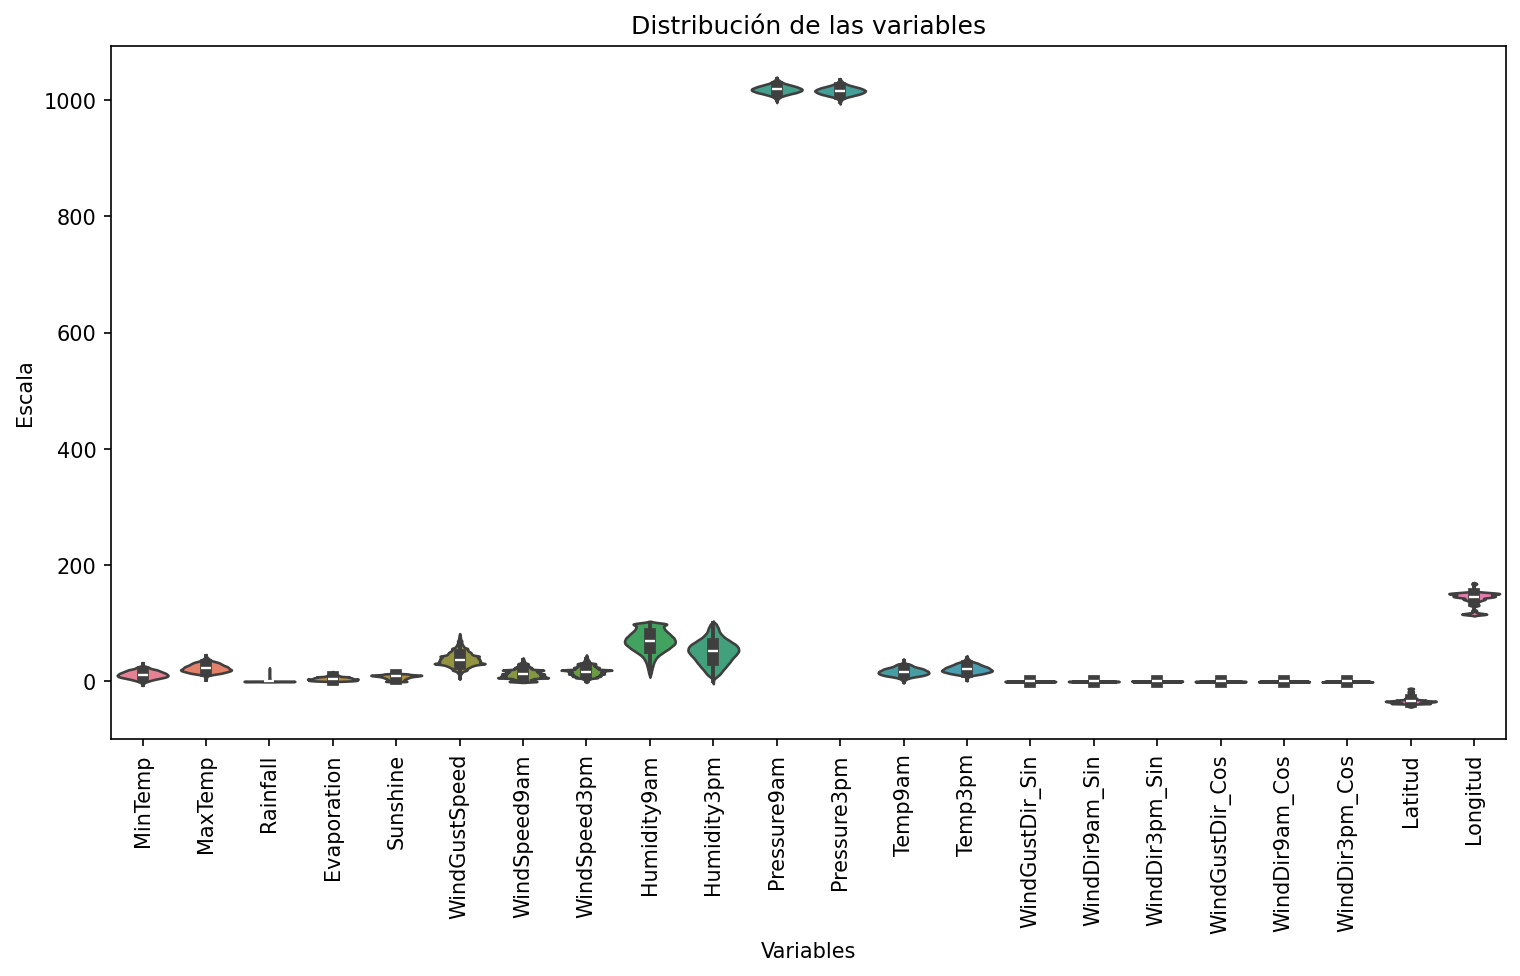

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure( figsize = (12,6), dpi=150)
plt.xticks(rotation=90)
sns.violinplot( data=df_after_outliers_removal)
plt.ylabel("Escala")
plt.xlabel("Variables")
plt.title("Distribución de las variables")

plt.show()

Se puede observar la distribución de las diferentes variables en escalas muy distintas. Algunas variables tienen valores que llegan a más de 1000 (como las variables relacionadas con la presión atmosférica), mientras que otras están mucho más cerca de cero, como la evaporación y la lluvia. Esta disparidad en las escalas de las variables puede ser un problema cuando se utilizan ciertos algoritmos de machine learning, como la regresión logística, el k-NN o los modelos basados en distancias (SVM, K-means), que son sensibles a las diferencias de magnitudes.

Por lo tanto, se va a realizar un escalamiento de los datos antes de aplicar cualquier algoritmo de machine learning. La elección de la técnica de escalamiento dependerá de las características específicas de los datos y del problema en cuestión.

Se utilizarán dos metodos de escalamiento diferentes: Estandarización y Normalizacion. Esto se debe a que luego se van a utilizar más de un modelo de machine learning y, dependiendo cuál se use, es el escalamiento que conviene utilizar.


In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
df_standard_scaled = scaler_standard.fit_transform(df_after_outliers_removal[new_numerical_columns])

scaler_minmax = MinMaxScaler()
df_minmax_scaled = scaler_minmax.fit_transform(df_after_outliers_removal[new_numerical_columns])


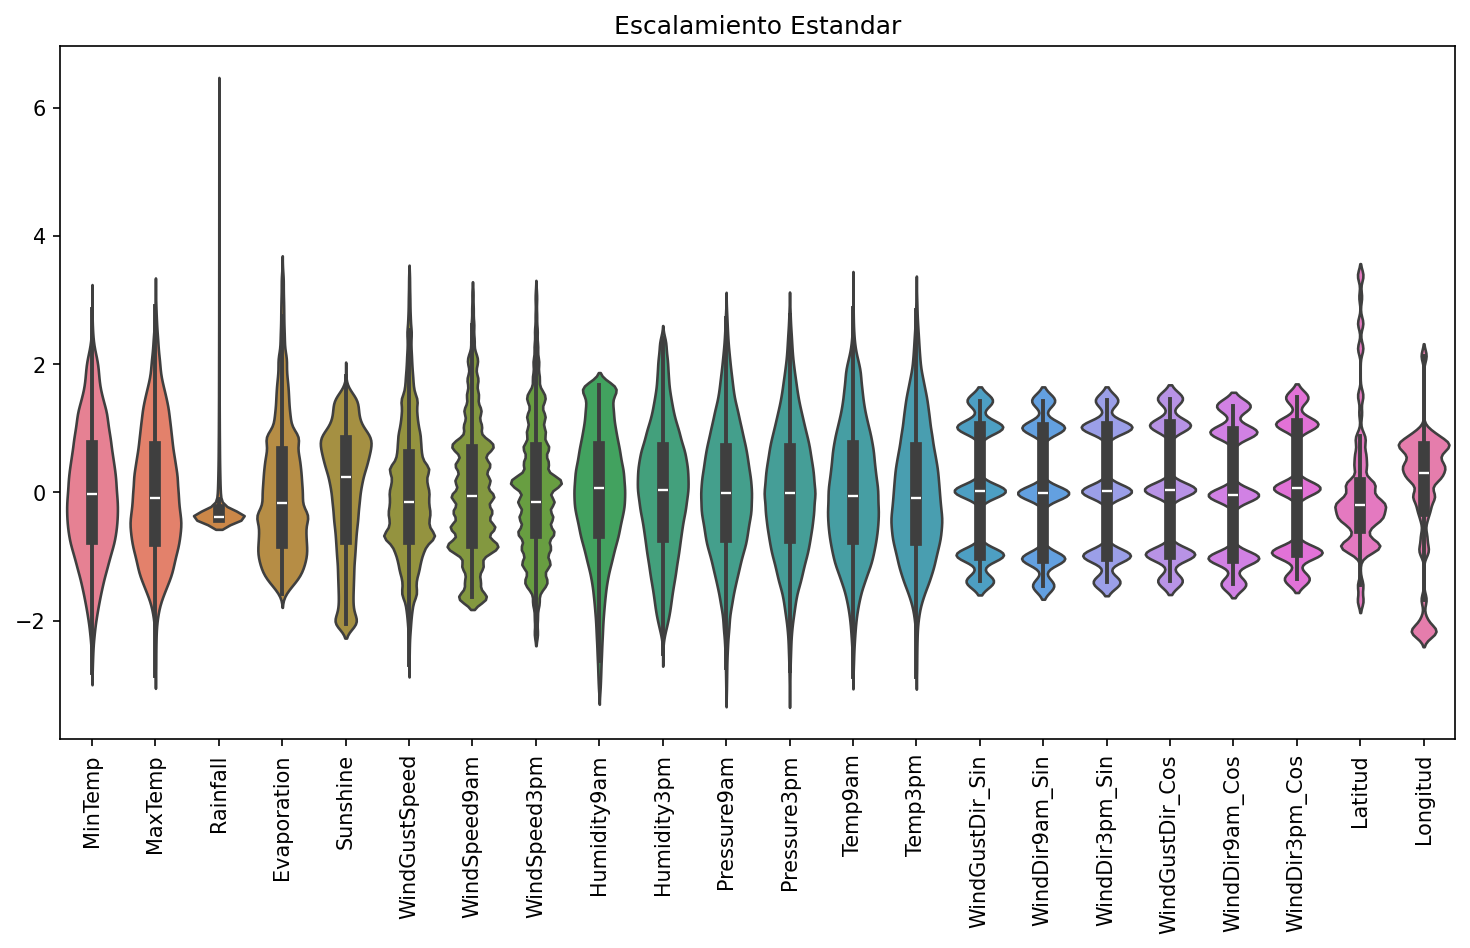

In [61]:
df_standard_scaled = pd.DataFrame(df_standard_scaled, columns=new_numerical_columns) 
plt.figure( figsize = (12,6), dpi=150)
plt.xticks(rotation=90)
plt.title("Escalamiento Estandar")
sns.violinplot(data=df_standard_scaled)

plt.show()

In [62]:
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=new_numerical_columns)
plt.figure( figsize = (12,6), dpi=150)
plt.xticks(rotation=90)
plt.title("Escalamiento MinMax")
sns.violinplot(data=df_minmax_scaled)

plt.show()

In [63]:
plt.figure( figsize = (12,6), dpi=150)
plt.xticks(rotation=90)
plt.title("Escalamiento Estandar")
sns.boxplot(data=df_standard_scaled)

plt.show()

In [64]:
plt.figure( figsize = (12,6), dpi=150)
plt.xticks(rotation=90)
plt.title("Escalamiento MinMax")
sns.boxplot(data=df_minmax_scaled)

plt.show()

In [65]:
# Le agrego nuevamente las categoricas, pero saco las de la direccion del viento ya que esas fueron modificadas por las de WindSin

df_full_minmax = df_2_copy.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1).copy()
df_full_standard = df_2_copy.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1).copy()

df_full_minmax.loc[:, new_numerical_columns] = df_minmax_scaled[new_numerical_columns]
df_full_standard.loc[:, new_numerical_columns] = df_standard_scaled[new_numerical_columns]

# df_full_minmax.head()
df_full_standard.head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.206623 -0.051830 -0.214521          NaN       NaN       0.413145   
1 -0.742134  0.266059 -0.388562          NaN       NaN       0.413145   
2  0.127560  0.352756 -0.388562          NaN       NaN       0.576448   
3 -0.457507  0.685095 -0.388562          NaN       NaN      -1.219882   
4  0.854940  1.306424 -0.098494          NaN       NaN       0.168191   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  RainToday  \
0      0.789112      0.698622     0.116417    -1.437602  ...         No   
1     -1.153882      0.456719    -1.338751    -1.289520  ...         No   
2      0.667675      0.940524    -1.662121    -1.042717  ...         No   
3     -0.303822     -1.115648    -1.284856    -1.733766  ...         No   
4     -0.789570      0.214817     0.709262    -0.894635  ...         No   

   RainTomorrow   Latitud  Longitud  WindGustDir_Sin  WindDir9am_Sin  \
0            No -0.556121  0.399368        -1.386448       -1.453676   
1            No -0.556121  0.399368              NaN             NaN   
2            No -0.556121  0.399368              NaN       -1.453676   
3            No -0.556121  0.399368         1.017992        1.008608   
4            No -0.556121  0.399368        -1.386448             NaN   

  WindDir3pm_Sin WindGustDir_Cos  WindDir9am_Cos  WindDir3pm_Cos  
0            NaN        0.041284       -0.042080             NaN  
1            NaN             NaN             NaN             NaN  
2            NaN             NaN       -0.042080             NaN  
3       1.432486        1.046486       -1.024217        0.064280  
4      -0.985834        0.041284             NaN        1.064773  

[5 rows x 26 columns]

## Imputación de valores faltantes

Al finalizar el tratamiento de outliers y el escalamiento, el resultado es el siguiente:

In [66]:
df_full_minmax.isnull().sum()

MinTemp             9885
MaxTemp             9679
Rainfall           11598
Evaporation        67666
Sunshine           74188
WindGustSpeed      18189
WindSpeed9am       10145
WindSpeed3pm       11367
Humidity9am        10909
Humidity3pm        12663
Pressure9am        22467
Pressure3pm        22426
Cloud9am           55888
Cloud3pm           59358
Temp9am            10071
Temp3pm            11808
RainToday           3261
RainTomorrow        3267
Latitud                0
Longitud               0
WindGustDir_Sin    74243
WindDir9am_Sin     73278
WindDir3pm_Sin     70997
WindGustDir_Cos    74243
WindDir9am_Cos     73278
WindDir3pm_Cos     70997
dtype: int64

In [67]:
df_full_standard.isnull().sum()

MinTemp             9885
MaxTemp             9679
Rainfall           11598
Evaporation        67666
Sunshine           74188
WindGustSpeed      18189
WindSpeed9am       10145
WindSpeed3pm       11367
Humidity9am        10909
Humidity3pm        12663
Pressure9am        22467
Pressure3pm        22426
Cloud9am           55888
Cloud3pm           59358
Temp9am            10071
Temp3pm            11808
RainToday           3261
RainTomorrow        3267
Latitud                0
Longitud               0
WindGustDir_Sin    74243
WindDir9am_Sin     73278
WindDir3pm_Sin     70997
WindGustDir_Cos    74243
WindDir9am_Cos     73278
WindDir3pm_Cos     70997
dtype: int64

Lo que se pretende ahora es completar los datos faltantes. Seguir quitando observaciones en este punto es contraproducente puesto que el dataset resultante tendría muy pocos datos, impidiendo un correcto entrenamiento.

In [68]:
def boolToBinary(df, columns_to_map):
    
    df_binary_converted = df.copy()
    
    for column in columns_to_map:
        df_binary_converted[column] = df_binary_converted[column].map({'No': 0, 'Yes': 1})
        
    return df_binary_converted

In [69]:
bool_columns = ['RainToday', 'RainTomorrow']

df_standard_final = boolToBinary(df_full_standard, bool_columns)
df_minmax_final = boolToBinary(df_full_minmax, bool_columns)

In [70]:
df_standard_final.head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.206623 -0.051830 -0.214521          NaN       NaN       0.413145   
1 -0.742134  0.266059 -0.388562          NaN       NaN       0.413145   
2  0.127560  0.352756 -0.388562          NaN       NaN       0.576448   
3 -0.457507  0.685095 -0.388562          NaN       NaN      -1.219882   
4  0.854940  1.306424 -0.098494          NaN       NaN       0.168191   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  RainToday  \
0      0.789112      0.698622     0.116417    -1.437602  ...        0.0   
1     -1.153882      0.456719    -1.338751    -1.289520  ...        0.0   
2      0.667675      0.940524    -1.662121    -1.042717  ...        0.0   
3     -0.303822     -1.115648    -1.284856    -1.733766  ...        0.0   
4     -0.789570      0.214817     0.709262    -0.894635  ...        0.0   

   RainTomorrow   Latitud  Longitud  WindGustDir_Sin  WindDir9am_Sin  \
0           0.0 -0.556121  0.399368        -1.386448       -1.453676   
1           0.0 -0.556121  0.399368              NaN             NaN   
2           0.0 -0.556121  0.399368              NaN       -1.453676   
3           0.0 -0.556121  0.399368         1.017992        1.008608   
4           0.0 -0.556121  0.399368        -1.386448             NaN   

   WindDir3pm_Sin  WindGustDir_Cos  WindDir9am_Cos  WindDir3pm_Cos  
0             NaN         0.041284       -0.042080             NaN  
1             NaN              NaN             NaN             NaN  
2             NaN              NaN       -0.042080             NaN  
3        1.432486         1.046486       -1.024217        0.064280  
4       -0.985834         0.041284             NaN        1.064773  

[5 rows x 26 columns]

### Imputacion de datos con Stardard Scaler

Se realiza un drop de aquellas observaciones que no posean valor en 'RainTomorrow' antes de imputar. De lo contrario, se estaría realizando una inferencia antes de tiempo.

In [71]:
__df_standard_final = df_standard_final.copy()
__df_standard_final = __df_standard_final.dropna(subset=['RainTomorrow'])

In [72]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [73]:
imputer = IterativeImputer(max_iter=10, random_state=0)

standard_data_imputed = imputer.fit_transform(__df_standard_final)

standard_data_imputed_df = pd.DataFrame(standard_data_imputed, columns=df_standard_final.columns)

C:\Users\Ramiro\anaconda3\envs\maestria\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [74]:
standard_data_imputed_df.sample(10)

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
122656  1.503256  1.595414 -0.388562     2.059202  0.487613       0.739751   
114030  0.064309 -0.441967  1.641912    -0.663772  0.480821       0.004889   
116885  0.744251  0.627297  0.655682     0.134115  0.801709      -0.158414   
51030  -1.959704 -2.089212 -0.214521    -0.926452 -0.640703       1.637916   
70410  -0.346819 -0.441967 -0.156508    -0.602505 -0.963176       0.331494   
56027  -1.327200 -1.930267 -0.388562    -1.517920 -1.384967      -0.893276   
47086  -2.655459 -1.438984 -0.388562    -1.858253  0.444376      -0.729974   
93658   2.040885  1.234176 -0.388562     2.037053  0.976550       0.004889   
121825 -1.137449 -1.019948  0.829722    -0.998158 -0.444737       1.637916   
14549   1.234442  1.002984 -0.098494     0.786902  0.098254       1.066356   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  RainToday  \
122656      1.517734      1.182427    -2.362757     0.388744  ...        0.0   
114030     -0.060948      0.940524     0.655367     0.339383  ...        1.0   
116885      1.031986      0.093865    -0.206954    -0.697192  ...        1.0   
51030       2.003483      0.698622    -0.368639    -0.252945  ...        0.0   
70410       0.667675      1.182427     0.601472     0.931711  ...        0.0   
56027      -0.060948      0.093865     0.385892     0.684908  ...        0.0   
47086      -0.911008      0.093865     1.140423    -0.055503  ...        0.0   
93658       0.424801      1.424330    -1.069275     0.092579  ...        0.0   
121825      1.031986      1.424330    -0.368639     0.438104  ...        1.0   
14549       1.760609      0.214817    -0.099164    -0.104863  ...        0.0   

        RainTomorrow   Latitud  Longitud  WindGustDir_Sin  WindDir9am_Sin  \
122656           0.0  0.086514 -1.671777         0.027752        0.170085   
114030           1.0  0.148394 -2.149303        -1.386448       -1.314595   
116885           0.0  0.135888 -2.148809         0.669180        1.431069   
51030            1.0 -0.467913  0.554398        -1.604156       -1.453676   
70410            0.0 -0.240956  0.005879        -1.212260       -1.453676   
56027            0.0 -0.803604  0.147200         0.011586       -0.004181   
47086            0.0 -0.422858  0.581933        -0.286602       -0.011304   
93658            0.0  2.248748  0.391586         1.017992        0.391528   
121825           1.0  0.086514 -1.671777        -1.143551       -1.031215   
14549            0.0  0.548215  0.640914         1.017992        1.008608   

        WindDir3pm_Sin  WindGustDir_Cos  WindDir9am_Cos  WindDir3pm_Cos  
122656        0.008958        -0.821689       -0.262652       -1.401242  
114030       -1.400752         0.041284        0.488471        0.064280  
116885        0.015867        -1.371589       -0.042080       -1.350631  
51030        -1.400752         0.031829       -0.042080        0.064280  
70410        -0.721532        -0.034037       -0.042080       -0.568358  
56027         0.015867         1.318522        0.591351        1.479191  
47086        -0.302716         1.282443        1.346872        1.073391  
93658         0.986667         1.046486       -0.089058        0.478997  
121825       -0.985834         1.071249        0.940058        1.064773  
14549         0.888783         1.046486        0.940058        1.219497  

[10 rows x 26 columns]

In [75]:
standard_data_imputed_df.isnull().sum()

MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustSpeed      0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
Latitud            0
Longitud           0
WindGustDir_Sin    0
WindDir9am_Sin     0
WindDir3pm_Sin     0
WindGustDir_Cos    0
WindDir9am_Cos     0
WindDir3pm_Cos     0
dtype: int64

### Imputacion de datos con MinMax Scaler

In [76]:
__df_minmax_final = df_minmax_final.copy()
__df_minmax_final = __df_minmax_final.dropna(subset=['RainTomorrow'])

In [77]:
imputer = IterativeImputer(max_iter=10, random_state=0)

minmax_data_imputed = imputer.fit_transform(__df_minmax_final)

min_max_data_imputed_df = pd.DataFrame(minmax_data_imputed, columns=df_minmax_final.columns)

C:\Users\Ramiro\anaconda3\envs\maestria\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [78]:
min_max_data_imputed_df.sample(10)

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
132069  0.415094  0.359712  0.347826     0.266850  0.514529       0.567568   
13010   0.628032  0.673861  0.000000     0.387879  0.751724       0.391892   
98825   0.504043  0.345324  0.286957     0.339394  0.565517       0.540541   
11702   0.687332  0.618705  0.000000     0.403614  0.725426       0.743243   
93215   0.480028  0.503641  0.005541     0.295779  0.741811       0.380167   
64015   0.196765  0.208633  0.000000     0.072727  0.172414       0.648649   
41123   0.336927  0.412470  0.000000     0.630303  0.643976       0.492019   
17388   0.331624  0.417266  0.000000     0.142915  0.704866       0.263079   
69670   0.525606  0.323741  0.060870     0.278788  0.034483       0.270270   
112835  0.450135  0.386091  0.304348     0.193447  0.379310       0.513514   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  RainToday  \
132069      0.564103      0.159091     0.573034     0.520000  ...        1.0   
13010       0.487179      0.295455     0.651685     0.360000  ...        0.0   
98825       0.384615      0.295455     0.696629     0.600000  ...        1.0   
11702       0.564103      0.840909     0.662921     0.650000  ...        0.0   
93215       0.345566      0.423543     0.543828     0.410937  ...        0.0   
64015       0.487179      0.681818     0.752809     0.630000  ...        0.0   
41123       0.333333      0.500000     0.404494     0.500000  ...        0.0   
17388       0.000000      0.273531     0.808989     0.510850  ...        0.0   
69670       0.333333      0.295455     0.910112     0.820000  ...        1.0   
112835      0.230769      0.545455     0.932584     0.530000  ...        1.0   

        RainTomorrow   Latitud  Longitud  WindGustDir_Sin  WindDir9am_Sin  \
132069           0.0  0.047632  0.606359         0.358733        0.401860   
13010            0.0  0.441337  0.657555         0.903743        0.853553   
98825            0.0  0.166085  0.485899         0.146447        0.146447   
11702            0.0  0.413716  0.719326         0.853553        0.853553   
93215            0.0  0.776605  0.600307         0.628669        0.533294   
64015            0.0  0.171233  0.562961         0.500000        0.500000   
41123            0.0  0.330941  0.695086         0.834636        0.707537   
17388            0.0  0.327263  0.694084         0.443701        0.410945   
69670            1.0  0.285749  0.511744         0.853553        0.853553   
112835           1.0  0.362511  0.016889         0.231090        0.344247   

        WindDir3pm_Sin  WindGustDir_Cos  WindDir9am_Cos  WindDir3pm_Cos  
132069        0.455282         0.410395        0.516439        0.409359  
13010         0.500000         0.906873        0.853553        1.000000  
98825         0.146447         0.853553        0.146447        0.146447  
11702         0.853553         0.853553        0.853553        0.853553  
93215         0.648464         0.487115        0.365008        0.500196  
64015         0.500000         1.000000        1.000000        1.000000  
41123         0.853553         0.351203        0.116440        0.146447  
17388         0.540313         0.549250        0.614871        0.599083  
69670         0.769275         0.146447        0.146447        0.074025  
112835        0.054377         0.273192        0.376493        0.234119  

[10 rows x 26 columns]

In [79]:
min_max_data_imputed_df.isnull().sum()

MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustSpeed      0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
Latitud            0
Longitud           0
WindGustDir_Sin    0
WindDir9am_Sin     0
WindDir3pm_Sin     0
WindGustDir_Cos    0
WindDir9am_Cos     0
WindDir3pm_Cos     0
dtype: int64

### Oversampling y Undersampling Standard Scaler

In [80]:
print(standard_data_imputed_df['RainTomorrow'].value_counts())

RainTomorrow
0.0    110316
1.0     31877
Name: count, dtype: int64


Aquí se puede observar la existencia de un desbalance de clases importante. Se utilizará undersampling y oversamplig para intentar subsanarlo.

In [81]:
from imblearn.over_sampling import SMOTE


x_dataset_std = standard_data_imputed_df.loc[:, standard_data_imputed_df.columns != 'RainTomorrow']
y_dataset_std = standard_data_imputed_df['RainTomorrow']

smote_enn = SMOTE(random_state=30)

# Aplicar la combinación de oversampling y undersampling
x_dataset_std_resampled, y_dataset_std_resampled = smote_enn.fit_resample(x_dataset_std, y_dataset_std)

print(f"Distribución después de SMOTE+ENN: {y_dataset_std_resampled.value_counts()}")


ModuleNotFoundError: No module named 'imblearn'

In [82]:
df[df.isnull().sum(axis=1) > 20]

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
984     2011-09-11         Albury      NaN      NaN       NaN          NaN   
985     2011-09-12         Albury      NaN      NaN       NaN          NaN   
2032    2014-09-22         Albury      NaN      NaN       NaN          NaN   
3525    2010-05-01  BadgerysCreek      NaN      NaN       NaN          NaN   
3526    2010-05-02  BadgerysCreek      NaN      NaN       NaN          NaN   
...            ...            ...      ...      ...       ...          ...   
127747  2011-08-07        Walpole      NaN      NaN       NaN          NaN   
127748  2011-08-08        Walpole      NaN      NaN       NaN          NaN   
127749  2011-08-09        Walpole      NaN      NaN       NaN          NaN   
136063  2017-06-18     Launceston      NaN      NaN       NaN          NaN   
144260  2014-03-14          Uluru      NaN      NaN       NaN          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
984          NaN         NaN            NaN        NaN  ...         NaN   
985          NaN         NaN            NaN        NaN  ...         NaN   
2032         NaN         NaN            NaN        NaN  ...         NaN   
3525         NaN         NaN            NaN        NaN  ...         NaN   
3526         NaN         NaN            NaN        NaN  ...         NaN   
...          ...         ...            ...        ...  ...         ...   
127747       NaN         NaN            NaN        NaN  ...         NaN   
127748       NaN         NaN            NaN        NaN  ...         NaN   
127749       NaN         NaN            NaN        NaN  ...         NaN   
136063       NaN         NaN            NaN        NaN  ...         NaN   
144260       NaN         NaN            NaN        NaN  ...         NaN   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
984             NaN          NaN          NaN       NaN       NaN      NaN   
985             NaN          NaN          NaN       NaN       NaN      NaN   
2032            NaN          NaN          NaN       NaN       NaN      NaN   
3525            NaN          NaN          NaN       NaN       NaN      NaN   
3526            NaN          NaN          NaN       NaN       NaN      NaN   
...             ...          ...          ...       ...       ...      ...   
127747          NaN          NaN          NaN       NaN       NaN      NaN   
127748          NaN          NaN          NaN       NaN       NaN      NaN   
127749          NaN          NaN          NaN       NaN       NaN      NaN   
136063          NaN          NaN          NaN       NaN       NaN      NaN   
144260          NaN          NaN          NaN       NaN       NaN      NaN   

        Temp3pm  RainToday  RainTomorrow  
984         NaN        NaN           NaN  
985         NaN        NaN           NaN  
2032        NaN        NaN           NaN  
3525        NaN        NaN           NaN  
3526        NaN        NaN           NaN  
...         ...        ...           ...  
127747      NaN        NaN           NaN  
127748      NaN        NaN           NaN  
127749      NaN        NaN           NaN  
136063      NaN        NaN           NaN  
144260      NaN        NaN           NaN  

[182 rows x 23 columns]

### Oversampling y Undersampling MinMax Scaler

In [ ]:
print(min_max_data_imputed_df['RainTomorrow'].value_counts())

In [ ]:
x_dataset_minmax = min_max_data_imputed_df.loc[:, min_max_data_imputed_df.columns != 'RainTomorrow']
y_dataset_minmax = min_max_data_imputed_df['RainTomorrow']

smote_enn = SMOTE(random_state=30)

# Aplicar la combinación de oversampling y undersampling
x_dataset_minmax_resampled, y_dataset_minmax_resampled = smote_enn.fit_resample(x_dataset_minmax, y_dataset_minmax)

print(f"Distribución después de SMOTE+ENN: {y_dataset_minmax_resampled.value_counts()}")

### PCA para Stardard Scaler

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca_std = pca.fit_transform(x_dataset_std_resampled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
components_needed = next(i for i,el in enumerate(cumulative_variance_ratio) if el > 0.95)
exp_variance_cn = float(f'{cumulative_variance_ratio[components_needed]:0.3f}')
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.plot(components_needed, exp_variance_cn,'ro', label=f'PCA({components_needed}); ExpVar: {100*exp_variance_cn}%')
plt.legend()
plt.show()

### PCA para MinMax Scaler

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca_minmax = pca.fit_transform(x_dataset_minmax_resampled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
components_needed = next(i for i,el in enumerate(cumulative_variance_ratio) if el > 0.95)
exp_variance_cn = float(f'{cumulative_variance_ratio[components_needed]:0.3f}')
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.plot(components_needed, exp_variance_cn,'ro', label=f'PCA({components_needed}); ExpVar: {100*exp_variance_cn}%')
plt.legend()
plt.show()

### Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def test_LR(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    LR_model = LogisticRegression(max_iter=1000, random_state=42)
    LR_model.fit(x_train, y_train)
    predictions = LR_model.predict(x_test)
    print(classification_report(y_test, predictions))
    

In [ ]:
test_LR(x_dataset_std_resampled, y_dataset_std_resampled)

In [ ]:
test_LR(x_dataset_minmax_resampled, y_dataset_minmax_resampled)

In [ ]:
test_LR(x_pca_std, y_dataset_std_resampled)

In [ ]:
test_LR(x_pca_minmax, y_dataset_minmax_resampled)

### XGBoost

In [ ]:
import xgboost as xgb

def test_xgboost(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model = xgb.XGBClassifier()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(classification_report(y_test, predictions))

### XGBoost con RandomizedSearch

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

def test_xgboost_with_randomsearch(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = xgb.XGBClassifier(eval_metric='mlogloss')

    param_distributions = {
        'n_estimators': np.arange(50, 200, 50),
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': np.arange(3, 10, 2),
        'subsample': np.arange(0.7, 1.0, 0.1),
        'colsample_bytree': np.arange(0.7, 1.0, 0.1),
        'gamma': [0, 0.1, 0.2, 0.3],
        'reg_lambda': [1, 10, 100],
        'reg_alpha': [0, 0.1, 0.5]
    }

    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=20, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

    random_search.fit(x_train, y_train)

    print("Best hyperparameters: ", random_search.best_params_)

    best_model = random_search.best_estimator_
    predictions = best_model.predict(x_test)
    print(classification_report(y_test, predictions))


#### XGBoost con escalamiento STD sin PCA

In [ ]:
print("Sin seleccion de Hiperparametros\n")
test_xgboost(x_dataset_std_resampled, y_dataset_std_resampled)
print("Con seleccion de Hiperparametros\n")
test_xgboost_with_randomsearch(x_dataset_std_resampled, y_dataset_std_resampled)

#### XGBoost con escalamiento MinMax sin PCA

In [ ]:
print("Sin seleccion de Hiperparametros\n")
test_xgboost(x_dataset_minmax_resampled, y_dataset_minmax_resampled)
print("Con seleccion de Hiperparametros\n")
test_xgboost_with_randomsearch(x_dataset_minmax_resampled, y_dataset_minmax_resampled)

#### XGBoost con escalamiento STD con PCA

In [ ]:
print("Sin seleccion de Hiperparametros\n")
test_xgboost(x_pca_std, y_dataset_std_resampled)
print("Con seleccion de Hiperparametros\n")
test_xgboost_with_randomsearch(x_pca_std, y_dataset_std_resampled)

#### XGBoost con escalamiento MinMax con PCA

In [ ]:
print("Sin seleccion de Hiperparametros\n")
test_xgboost(x_pca_minmax, y_dataset_minmax_resampled)
print("Con seleccion de Hiperparametros\n")
test_xgboost_with_randomsearch(x_pca_minmax, y_dataset_minmax_resampled)